# <h1 style="font-family: Source Sans Pro; padding: 12px; font-size: 48px; color: #F6416C; text-align: center; line-height: 1.25;"><b>Stroke predection EDA & Modeling </span></b><br><span style="color: #FF9A00; font-size: 24px">with Classification Machine Learning Models </span></h1>
<hr>

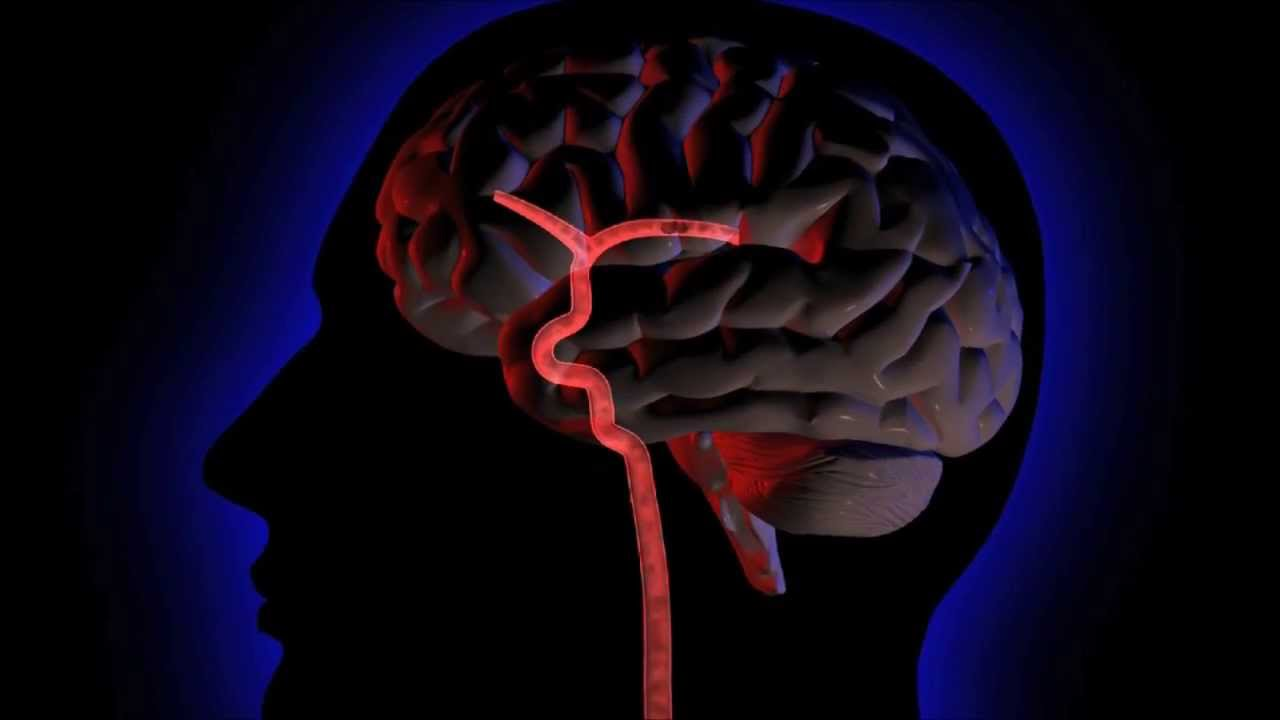

# <div style="font-family: Trebuchet MS; background-color: #F8F3D4; color: #F6416C; padding: 12px; line-height: 1.5;">Table Of Content  </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    
<h3 style="text-indent: 10vw; font-family: Verdana; color: F6416C;font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px;  background-color: #ffffff;"><a href="#background_motivation">1.&nbsp;&nbsp;&nbsp;&nbsp;Introduction</a></h3>



<h3 style="text-indent: 10vw; font-family: Verdana; color: F6416C;font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px;  background-color: #ffffff;"><a href="#background_motivation">2.&nbsp;&nbsp;&nbsp;&nbsp;Importing Libraries</a></h3>



<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#package">3.&nbsp;&nbsp;&nbsp;&nbsp;DEA & Analysis</a></h3>



<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#firstlook">4.&nbsp;&nbsp;&nbsp;&nbsp;Preprocessing</a></h3>

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#package">5.&nbsp;&nbsp;&nbsp;&nbsp;Split Data </a></h3>

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#EDA">6.&nbsp;&nbsp;&nbsp;&nbsp;Modeling</a></h3>



<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#feature_to_target">7.&nbsp;&nbsp;&nbsp;&nbsp;Overview </a></h3>

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#feature_to_target">8.&nbsp;&nbsp;&nbsp;&nbsp;Conclusion </a></h3>
​


---



# <div style="font-family: Trebuchet MS; background-color: #F8F3D4; color: #F6416C; padding: 12px; line-height: 1.5;">1. Introduction
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">

**A stroke is a serious life-threatening medical condition that happens when the blood supply to part of the brain is cut off.Strokes are a medical emergency and urgent treatment is essential.**

The sooner a person receives treatment for a stroke, the less damage is likely to happen.


- **Symptoms of a stroke**

The main symptoms of stroke can be remembered with the word FAST:

Face – the face may have dropped on 1 side, the person may not be able to smile, or their mouth or eye may have dropped.

Arms – the person with suspected stroke may not be able to lift both arms and keep them there because of weakness or numbness in 1 arm.

Speech – their speech may be slurred or garbled, or the person may not be able to talk at all despite appearing to be awake; they may also have problems understanding what you're saying to them.



# <div style="font-family: Trebuchet MS; background-color: #F8F3D4; color: #F6416C; padding: 12px; line-height: 1.5;">2. Importing the needed libraries 
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">

In [1]:
import warnings 
warnings.filterwarnings('ignore')

# basic libraries
import os
import numpy as np
import pandas as pd
import re
import string
from collections import Counter
import time

#visulaization modules
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
import pandas_profiling as pp
!pip install pywaffle
from pywaffle import Waffle

%matplotlib inline
init_notebook_mode(connected= True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
from sklearn.metrics import classification_report ,f1_score,precision_score,recall_score,roc_auc_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 13.8 MB/s eta 0:00:00


# <div style="font-family: Trebuchet MS; background-color: #F8F3D4; color: #F6416C; padding: 12px; line-height: 1.5;">3. EDA and Analysis
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">

<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> Attribute Information</h4> 


* 1) **id:** unique identifier
* 2) **gender:** "Male", "Female" or "Other"
* 3) **age:** age of the patient
* 4) **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* 5) **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* 6) **ever_married:** "No" or "Yes"
* 7) **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* 8) **Residence_type:** "Rural" or "Urban"
* 9) **avg_glucose_level:** average glucose level in blood
* 10) **bmi:** body mass index
* 11) **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*
* 12) **stroke:** 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [2]:
# loading data
data = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv', delimiter = ',', encoding = 'utf-8')
data.head() 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#columns of the data
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
#shape of the data
data.shape

(5110, 12)

In [5]:
# take a shallow copy from my data 
df=data.copy()


In [6]:
fig=px.pie(df,values=df["stroke"].value_counts(),
           names=["آNo Stroke","stroke"],title="<b>Percentage of People Having Strokes",
           hole=.5,
       color_discrete_sequence=px.colors.qualitative.Pastel,template="plotly")
fig.update_layout(title_font_size=35)
fig.show()

In [7]:
#description of percent of data object columns
col=df.select_dtypes(include=['object']).columns.tolist()
#create iteration of object columns
for i in col[:]:
    count=df.groupby(['stroke'])[i].value_counts()[1]
    percent=df.groupby(['stroke'])[i].value_counts(normalize=True)[1]
    display(pd.DataFrame({"Patients":count, "Percent":percent*100})\
            .sort_values("Percent", ascending=False)
            .style.set_caption('Variable: {}'.format(i))\
            .format({"Percent": "{:,.1f}%"}))
           


,Patients,Percent
gender,,
Female,141,56.6%
Male,108,43.4%


,Patients,Percent
ever_married,,
Yes,220,88.4%
No,29,11.6%


,Patients,Percent
work_type,,
Private,149,59.8%
Self-employed,65,26.1%
Govt_job,33,13.3%
children,2,0.8%


,Patients,Percent
Residence_type,,
Urban,135,54.2%
Rural,114,45.8%


,Patients,Percent
smoking_status,,
never smoked,90,36.1%
formerly smoked,70,28.1%
Unknown,47,18.9%
smokes,42,16.9%


<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 2.1 Which gender is more likely to get strokes?</h4> 
<!-- #### 2.2 Does the hypertension have any effect on our taret? -->

<!-- #### 2.1 Which gender is more likely to get strokes? -->


In [8]:
# stroke_gen = df[df['stroke'] == 1]['gender'].value_counts()
# healthy_gen = df[df['stroke'] == 0]['gender'].value_counts()

# female = data['gender'].value_counts().values[0]
# male =  data['gender'].value_counts().values[1]

# stroke_female = int(round (stroke_gen.values[0] / female * 100, 0))
# stroke_male = int(round( stroke_gen.values[1] / male *100, 0))
# healthy_female = int(round(healthy_gen.values[0] / female * 100, 0))
# healthy_male = int(round(healthy_gen.values[1] / male *100, 0))

# female_per = int(round(female/(female+male) * 100, 0))
# male_per = int(round(male/(female+male)* 100, 0))



# fig = plt.figure(FigureClass = Waffle, 
#                  constrained_layout = True,
#                  figsize = (9,9),
#                  facecolor = 'white',dpi = 100,
                 
#                  plots = {121:
#                           {     
#                            'rows':7,
#                            'columns': 7,
#                            'values' : [healthy_male,stroke_male],
#                             'colors' : ['#BBE1FA','#0F4C75'],
#                               'vertical' : True,
#                               'interval_ratio_y': 0.1,
#                               'interval_ratio_x': 0.1,
#                               'icons' : 'male',
#                               'icon_legend': False,
#                               'icon_size':20,
#                               'plot_anchor':'C',
#                               'alpha':0.1
#                           },
                          
#                           122 :
#                           { 
#                             'rows': 7,
#                             'columns':7,
#                             'values':[healthy_female,stroke_female],         
#                               'colors' : ['#BBE1FA','#0F4C75'],
#                               'vertical': True,
#                               'interval_ratio_y': 0.1,
#                               'interval_ratio_x': 0.1,
#                               'icons' : 'female',
#                               'icon_legend' :False,
#                               'icon_size':20,
#                               'plot_anchor':'C',
#                               'alpha':0.1
                                                      
#                            }
#                          },
                   
# )
# #fig.text ('asdataasdataasd0', {'font':'Serif', 'size':35, 'color':'black'} )


# fig.text(0., 0.8, 'Gender Risk for Stroke - effect of gender on strokes?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
# fig.text(0., 0.73, 'Risk of stroke in both male and female are same,\nprove our initial assumption is wrong. ', {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.7)
# fig.text(0.24, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold' ,'color':'#ffffff'})
# fig.text(0.65, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold', 'color':'#ffffff'})
# fig.text(0.23, 0.28, '{}%'.format(healthy_male), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#0F4C75'},alpha = 1,)
# fig.text(0.65, 0.28, '{}%'.format(healthy_female), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#0F4C75'}, alpha = 1)
# fig.text(0.21, 0.67, 'Male ({}%)'.format(male_per), {'font':'Serif', 'size':10,'weight':'bold' ,'color':'#0F4C75'},alpha = 0.5,)
# fig.text(0.61, 0.67, 'Female({}%)'.format(female_per), {'font':'Serif', 'size':14,'weight':'bold', 'color':'#0F4C75'}, alpha = 0.5)
# #fig.text(0., 0.8, 'Assumption was proven wrong', {'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'})

# fig.text(0.9,0.73, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#0F4C75'})
# fig.text(1.02,0.73, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
# fig.text(1.035,0.73, 'No Stroke', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#0F4C75'},alpha = 0.5)


# fig.show()

 ### **From the previous illustration, risk of stroke on both males and females is the same which proves that our initial assumption is wrong.**
 ***

<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 2.2 Does the hypertension have any effect on our taret?</h4> 
<!-- #### 2.2 Does the hypertension have any effect on our taret? -->


In [9]:
# stroke_hyper = df[df['stroke'] == 1]['hypertension'].value_counts()
# healthy_hyper = df[df['stroke'] == 0]['hypertension'].value_counts()

# no = df['hypertension'].value_counts().values[0]
# yes =  df['hypertension'].value_counts().values[1]

# stroke_no = int(round (stroke_hyper.values[0] / no * 100, 0))
# stroke_yes = int(round( stroke_hyper.values[1] / yes *100, 0))
# healthy_no = int(round(healthy_hyper.values[0] / no * 100, 0))
# healthy_yes = int(round(healthy_hyper.values[1] / yes *100, 0))

# no_per = int(round(no/(no+yes) * 100, 0))
# yes_per = int(round(yes/(no+yes)* 100, 0))




# fig = plt.figure(FigureClass = Waffle, 
#                  constrained_layout = True,
#                  figsize = (9,9),
#                  facecolor = '#ffffff',dpi = 100,
                 
#                  plots = {'121':
#                           {     
#                            'rows':7,
#                            'columns': 7,
#                            'values' : [stroke_yes,healthy_yes],
#                             'colors' : ['#0F4C75','#BBE1FA'],
#                               'vertical' : True,
#                               'interval_ratio_x': 0.005,
#                               'interval_ratio_y': 0.005,
#                               'icons' : 'heartbeat',
#                               'icon_legend': False,
#                               'icon_size':20,
#                               'plot_anchor':'C',
#                               'alpha':1,
#                               'starting_location': 'NE'
#                           },
                          
#                           '122' :
#                           { 
#                             'rows': 7,
#                             'columns':7,
#                             'values':[stroke_no,healthy_no],         
#                               'colors' : ['#0F4C75','#BBE1FA'],
#                               'vertical': True,
#                               'interval_ratio_x': 0.005,
#                               'interval_ratio_y':0.005,
#                               'icons' : 'heartbeat',
#                               'icon_legend' :False,
#                               'icon_size':20,
#                               'plot_anchor':'C',
#                               'alpha':1,
#                               'starting_location': 'NE'
                                                      
#                            }
#                          },
                   
# )


# fig.text(0., 0.85, 'Hypertension Risk for Stroke- effect of blood pressure?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
# fig.text(0., 0.75, 'Risk of stroke for people with hypertension is comparetively high,\nnearly 9% more people are having strokes \nwhen they have hypertension. ', {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'},alpha = 0.8)
# fig.text(0.24, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold' ,'color':'white'})
# fig.text(0.65, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold', 'color':'white'})
# fig.text(0.23, 0.28, '{}%'.format(healthy_yes), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#0F4C75'},alpha = 1,)
# fig.text(0.63, 0.28, '{}%'.format(healthy_no), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#0F4C75'}, alpha = 1)
# fig.text(0.1, 0.68, 'Have Hypertension ({}%)'.format(yes_per), {'font':'Serif', 'size':14,'weight':'bold' ,'color':'#0F4C75'},alpha = 0.5,)
# fig.text(0.55, 0.68, "Don't have Hypertension({}%)".format(no_per), {'font':'Serif', 'size':14,'weight':'bold', 'color':'#0F4C75'}, alpha = 0.7)
# #fig.text(0., 0.8, 'Assumption was proven wrong', {'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'})

# fig.text(0.90,0.75, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#0F4C75'})
# fig.text(1.02,0.75, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
# fig.text(1.04,0.75, 'No Stroke', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#0F4C75'},alpha = 0.5)


# fig.show()

###  **Risk of stroke on the people with hypertension is high, nearly 9% more people are having strokes when they have hypertension.**
***

<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 2.3 What is the relationship between a person's being smoker and getting a stroke?</h4> 
<!-- ### **2.3 What is the relationship between a person's being smoker and getting a stroke?** -->


In [10]:
# smoke = df['smoking_status'].value_counts()
# stroke_smoke = df[df['stroke'] == 1]['smoking_status'].value_counts()
# healthy_smoke = df[df['stroke'] == 0]['smoking_status'].value_counts()

# never = smoke.values[0]
# unknown =  smoke.values[1]
# former = smoke.values[2]
# smokes = smoke.values[3]

# stroke_never = int(round (stroke_smoke.values[0] / never * 100, 0))
# stroke_unknown = int(round( stroke_smoke.values[2]  / unknown *100, 0))
# stroke_former = int(round (stroke_smoke.values[1]  / former * 100, 0))
# stroke_smokes = int(round( stroke_smoke.values[3]  / smokes *100, 0))

# healthy_never = int(round(healthy_smoke.values[0] / never * 100, 0))
# healthy_unknown = int(round(healthy_smoke.values[1] / unknown *100, 0))
# healthy_former = int(round(healthy_smoke.values[2] / former * 100, 0))
# healthy_smokes = int(round(healthy_smoke.values[3]/ smokes *100, 0))


# never_per = int(round(never/(never+unknown+former+smokes) * 100, 0))
# unknown_per = int(round(unknown/(never+unknown+former+smokes)* 100, 0))
# former_per = int(round(former/(never+unknown+former+smokes) * 100, 0))
# smokes_per = int(round(smokes/(never+unknown+former+smokes)* 100, 0))



# fig = plt.figure(FigureClass = Waffle, 
#                  constrained_layout = True,
#                  figsize = (20,20),
#                  facecolor = '#ffffff',dpi = 100,
                 
#                  plots = {(1,4,1):
#                           {     
#                            'rows':7,
#                            'columns': 7,
#                            'values' : [stroke_never,healthy_never],
#                             'colors' : ['#0F4C75','#BBE1FA'],
#                               'vertical' : True,
#                               'interval_ratio_x': 0.005,
#                               'interval_ratio_y': 0.005,
#                               'icons' : 'ban',
#                               'icon_legend': False,
#                               'icon_size':20,
#                               'plot_anchor':'C',
#                               'alpha':0.8,
#                               'starting_location': 'NE'
#                           },
                          
#                           (1,4,2) :
#                           { 
#                             'rows': 7,
#                             'columns':7,
#                             'values':[stroke_former,healthy_former],         
#                               'colors' : ['#0F4C75','#BBE1FA'],
#                               'vertical': True,
#                               'interval_ratio_x': 0.005,
#                               'interval_ratio_y':0.005,
#                               'icons' : 'smoking-ban',
#                               'icon_legend' :False,
#                               'icon_size':20,
#                               'plot_anchor':'C',
#                               'alpha':0.8,
#                               'starting_location': 'NE'
                                                      
#                            },
                          
#                           (1,4,3):
#                           {     
#                            'rows':7,
#                            'columns': 7,
#                            'values' : [stroke_unknown,healthy_unknown],
#                             'colors' : ['#0F4C75','#BBE1FA'],
#                               'vertical' : True,
#                               'interval_ratio_x': 0.005,
#                               'interval_ratio_y': 0.005,
#                               'icons' : 'question-circle',
#                               'icon_legend': False,
#                               'icon_size':20,
#                               'plot_anchor':'C',
#                               'alpha':0.8,
#                               'starting_location': 'NE'
#                           },
                          
#                           (1,4,4) :
#                           { 
#                             'rows': 7,
#                             'columns':7,
#                             'values':[stroke_smokes,healthy_smokes],         
#                               'colors' : ['#0F4C75','#BBE1FA'],
#                               'vertical': True,
#                               'interval_ratio_x': 0.006,
#                               'interval_ratio_y':0.006,
#                               'icons' : 'smoking',
#                               'icon_legend' :False,
#                               'icon_size':15,
#                               'plot_anchor':'C',
#                               'alpha':0.8,
#                               'starting_location': 'NE'
                                                      
#                            }
                          
#                          },
                   
# )


# fig.text(0.1, 0.65, 'Smoking and Stroke- Does smoking habit could cause Stroke?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
# fig.text(0.1, 0.62, 'Risk of stroke with smoking is interesting one, it seems smoking does have effect on strokes, and \nformer smokers are most likely to get strokes. ', {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.7)
# fig.text(0.18, 0.38, '{}%'.format(healthy_never), {'font':'Serif', 'size':24,'weight':'bold' ,'color':'#0F4C75'},alpha = 1,)
# fig.text(0.38, 0.38, '{}%'.format(healthy_former), {'font':'Serif', 'size':24,'weight':'bold', 'color':'#0F4C75'}, alpha = 1)
# fig.text(0.58, 0.38, '{}%'.format(healthy_unknown), {'font':'Serif', 'size':24,'weight':'bold' ,'color':'#0F4C75'},alpha = 1,)
# fig.text(0.78, 0.38, '{}%'.format(healthy_smokes), {'font':'Serif', 'size':24,'weight':'bold', 'color':'#0F4C75'}, alpha = 1)
# fig.text(0.14, 0.58, 'Never Smoked({}%)'.format(never_per), {'font':'Serif', 'size':14,'weight':'bold' ,'color':'#0F4C75'},alpha = 0.5,)
# fig.text(0.33, 0.58, "Formerly Smoked({}%)".format(former_per), {'font':'Serif', 'size':14,'weight':'bold', 'color':'#0F4C75'}, alpha = 0.5)
# fig.text(0.55, 0.58, 'Unknown({}%)'.format(unknown_per), {'font':'Serif', 'size':14,'weight':'bold' ,'color':'#0F4C75'},alpha = 0.5,)
# fig.text(0.75, 0.58, "Smokes({}%)".format(smokes_per), {'font':'Serif', 'size':14,'weight':'bold', 'color':'#0F4C75'}, alpha = 0.5)
# # fig.text(0., 0.8, 'Assumption was proven wong', {'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'})

# fig.text(0.7,0.62, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#0F4C75'})
# fig.text(0.76,0.62, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
# fig.text(0.77,0.62, 'No Stroke', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#0F4C75'},alpha = 0.5)


# fig.show()

### Risk of stroke on people who smoke is interesting one, it seems smoking does have a segnificant effect on our target, and former smokers are most likely to get strokes
****

<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 2.4 Is there any relationship between heart diseases and our target?</h4> 
<!-- ### **2.4 Is there any relationship between heart diseases and our target?** -->


In [11]:
# stroke_hyper = df[df['stroke'] == 1]['heart_disease'].value_counts()
# healthy_hyper = df[df['stroke'] == 0]['heart_disease'].value_counts()

# no = df['heart_disease'].value_counts().values[0]
# yes =  df['heart_disease'].value_counts().values[1]

# stroke_no = int(round (stroke_hyper.values[0] / no * 100, 0))
# stroke_yes = int(round( stroke_hyper.values[1] / yes *100, 0))
# healthy_no = int(round(healthy_hyper.values[0] / no * 100, 0))
# healthy_yes = int(round(healthy_hyper.values[1] / yes *100, 0))

# no_per = int(round(no/(no+yes) * 100, 0))
# yes_per = int(round(yes/(no+yes)* 100, 0))




# fig = plt.figure(FigureClass = Waffle, 
#                  constrained_layout = True,
#                  figsize = (9,9),
#                  facecolor = '#ffffff',dpi = 100,
                 
#                  plots = {'121':
#                           {     
#                            'rows':7,
#                            'columns': 7,
#                            'values' : [stroke_yes,healthy_yes],
#                             'colors' : ['#0F4C75','#BBE1FA'],
#                               'vertical' : True,
#                               'interval_ratio_x': 0.005,
#                               'interval_ratio_y': 0.005,
#                               'icons' : 'heart',
#                               'icon_legend': False,
#                               'icon_size':20,
#                               'plot_anchor':'C',
#                               'alpha':0.8,
#                               'starting_location': 'NE'
#                           },
                          
#                           '122' :
#                           { 
#                             'rows': 7,
#                             'columns':7,
#                             'values':[stroke_no,healthy_no],         
#                               'colors' : ['#0F4C75','#BBE1FA'],
#                               'vertical': True,
#                               'interval_ratio_x': 0.005,
#                               'interval_ratio_y':0.005,
#                               'icons' : 'heart',
#                               'icon_legend' :False,
#                               'icon_size':20,
#                               'plot_anchor':'C',
#                               'alpha':0.8,
#                               'starting_location': 'NE'
                                                      
#                            }
#                          },
                   
# )


# fig.text(0., 0.85, 'Heart disease Risk for Stroke- effect of Heart condition?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
# fig.text(0., 0.75, 'Risk of stroke for people with heart condition is significant,\nnearly 12% of people are having strokes \nwhen they have heart condition previously. ', {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.8)
# fig.text(0.24, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold' ,'color':'#ffffff'})
# fig.text(0.65, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold', 'color':'#ffffff'})
# fig.text(0.25, 0.27, '{}%'.format(healthy_yes), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#0F4C75'},alpha = 1,)
# fig.text(0.65, 0.27, '{}%'.format(healthy_no), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#0F4C75'}, alpha = 1)
# fig.text(0.12, 0.68, 'UnHealthy Heart ({}%)'.format(yes_per), {'font':'Serif', 'size':16,'weight':'bold' ,'color':'#0F4C75'},alpha = 0.5,)
# fig.text(0.55, 0.68, "Healthy Heart({}%)".format(no_per), {'font':'Serif', 'size':16,'weight':'bold', 'color':'#0F4C75'}, alpha = 0.5)
# #fig.text(0., 0.8, 'Assumption was proven wrong', {'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'})

# fig.text(0.9,0.75, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#0F4C75'})
# fig.text(1.02,0.75, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
# fig.text(1.04,0.75, 'No Stroke', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#0F4C75'},alpha = 0.5)


# fig.show()

 ### **Risk of stroke on people with heart condition is significant, nearly 12% of people are having strokes when they have heart condition previously.**
* ***

<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 2.5 Marriage and stroke- effects of marriage on stroke?</h4> 
<!-- ### **2.4 Is there any relationship between heart diseases and our target?** -->

<!-- ### **2.5 Marriage and stroke- effects of marriage on stroke?** -->


In [12]:
counts0 = Counter(df[df['stroke']==0]['ever_married'])
counts1 = Counter(df[df['stroke']==1]['ever_married'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Stroke Negative'), 
     row=1, col=1)
fig.update_traces(marker=dict(colors=['#19D3F3', '#FF6692']))
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Stroke Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs Marital Status','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Ever Married?",
    font=dict(size=18)
)

fig.show()

 ### **Risk of stroke on married people is high .. Perhaps married people have more responsibilities and are subjected to more pressure and that is life.**
***

<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 2.6 Does work pressure can cause Stroke ?</h4> 
<!-- ### **2.6 Does work pressure can cause Stroke ?** -->


In [13]:
counts0 = Counter(df[df['stroke']==0]['work_type'])
counts1 = Counter(df[df['stroke']==1]['work_type'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Stroke Negative'), 
     row=1, col=1)
fig.update_traces(marker=dict(colors=['#F6CF70','#F59F70','#66C4CC','#FF97FF','19D3F3']))

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Stroke Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs Worktype','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Worktype",
    font=dict(size=18)
)


fig.show()

 ### **From the previous charts we can conclude that people who are self-employeed are most likely to have strokes than the others. On the other hand most of strokes can be seen in the the people who work privetly.**
***

<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 2.7 Is there any relationship between the environment and our target?</h4> 
<!-- ### **2.7 Is there any relationship between the environment and our target?** -->


In [14]:
counts0 = Counter(df[df['Residence_type']=='Rural']['stroke'])
counts1 = Counter(df[df['Residence_type']=='Urban']['stroke'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[v for k,v in counts0.items()],
     labels=['Stroke Positive','Stroke Negative'],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Rural'), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=[v for k,v in counts1.items()],
     labels=['Stroke Positive','Stroke Negative'],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Urban'),
    row=1, col=2)
fig.update_traces(marker=dict(colors=['#F6CF70','#66C4CC']))

fig.update_layout(
    title={'text':'Residence Type vs Stroke','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Stroke Status",
    font=dict(size=18)
)

fig.show()

 ### **Location of home does not have that segnificant effect on our target. Both rural and urban people have similar possibilities of strokes.**
***

In [15]:
df['bmi'].fillna(df['bmi'].mode()[0],inplace=True)

<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 2.8 What is the relationship between the glucose level and the target?</h4> 
<!-- ### **2.8 What is the relationship between the glucose level and the target?** -->


In [16]:
glucose_bins = np.linspace(0,280,29)
bmi_bins = np.linspace(0,100,51)
age_bins = np.linspace(0,90,10)
df['binned_glucose'] = pd.cut(df['avg_glucose_level'], glucose_bins, labels=glucose_bins[:-1],right=False)
df['binned_bmi'] = pd.cut(df['bmi'], bmi_bins, labels=bmi_bins[:-1],right=False)
df['binned_age'] = pd.cut(df['age'], age_bins, labels=age_bins[:-1],right=False)
df['binned_glucose'] = df['binned_glucose'].astype('int')
df['binned_bmi'] = df['binned_bmi'].astype('int')
df['binned_age'] = df['binned_age'].astype('int')

Text(0, 0.5, 'Count')

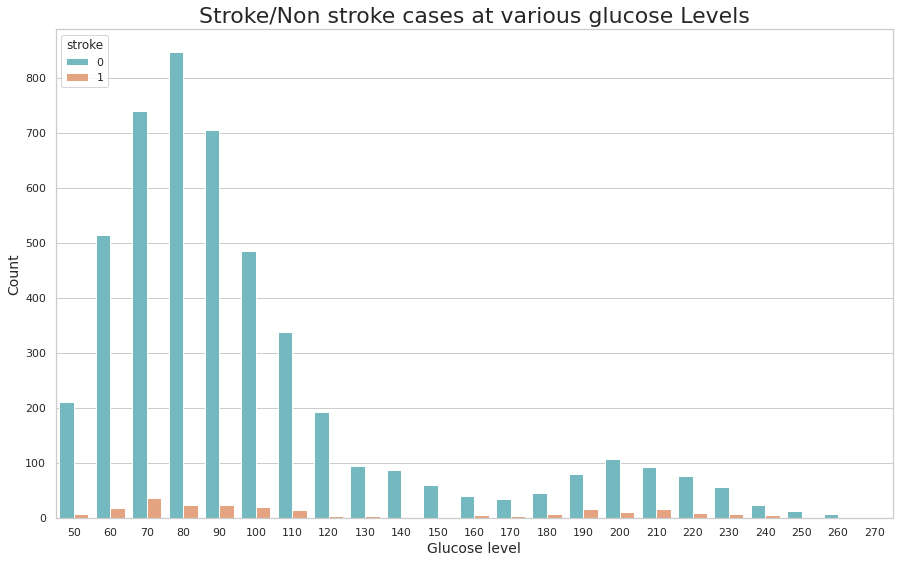

In [17]:
sns.set(rc={'figure.figsize':(15,9)})
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='binned_glucose',hue='stroke',palette=['#66C4CC',"#F59F70"],data=df)
ax.set_title('Stroke/Non stroke cases at various glucose Levels').set_fontsize(22)
ax.set_xlabel('Glucose level',fontsize=14)
ax.set_ylabel('Count',fontsize=14)


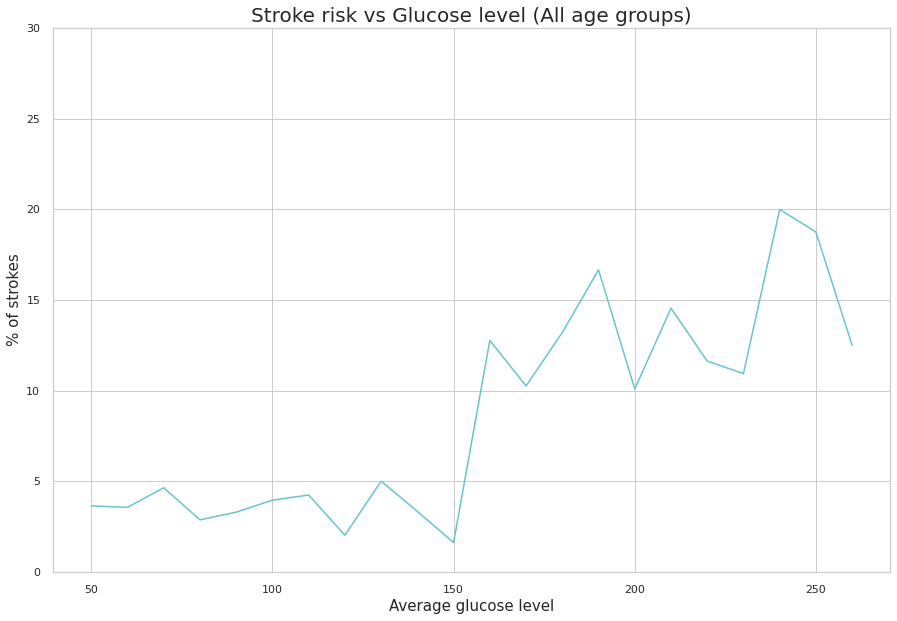

In [18]:
stroke_cases = Counter(df['binned_glucose'][df['stroke']==1])
total_cases = Counter(df['binned_glucose'])
stroke_pct = 100*np.array([item[1] for item in sorted(stroke_cases.items())])/np.array([item[1] for item in sorted(total_cases.items())])
labels = [item[0] for item in sorted(total_cases.items())]
plt.style.use('seaborn')
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.ylim(0,30)
plt.title('Stroke risk vs Glucose level (All age groups)',fontsize=20)
plt.ylabel('% of strokes',fontsize=15)
plt.xlabel('Average glucose level',fontsize=15)
plt.plot(labels[:-1],stroke_pct[:-1],'#66C4CC')

## **From two above plots :**
*  We notice that the normal range of glucose in the blood ranges between 120-150, increasing or decreasing may cause disease.
*  Increasing the level of glucose in the blood affects the incidence of stroke where an increase of more than 150 increases the incidence rate from 5% to 10%
* **


Text(0.5, 18.0, 'Average glucose level')

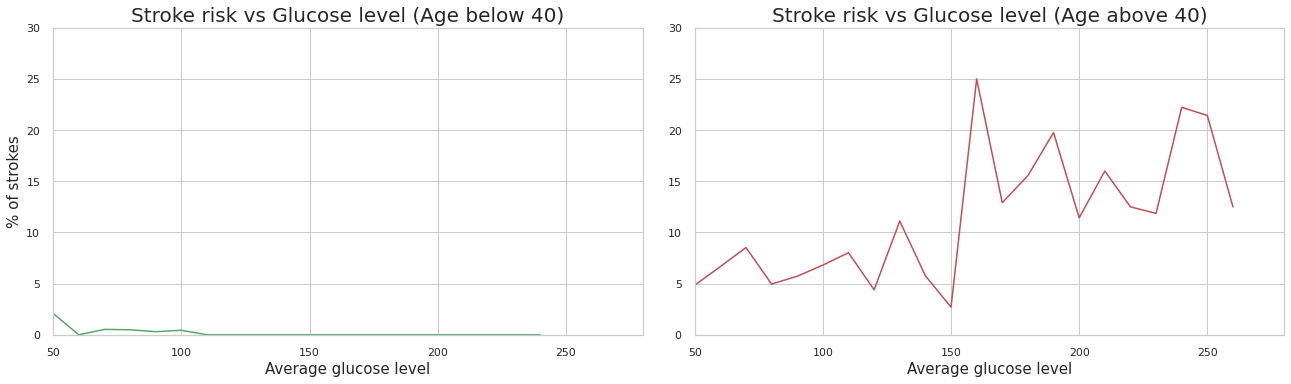

In [19]:
fix, ax = plt.subplots(1,2,figsize=(18,5))
plt.tight_layout()
stroke_cases = Counter(df['binned_glucose'][(df['binned_age']<40) & (df['stroke']==1)])
total_cases = Counter(df['binned_glucose'][df['binned_age']<40])
z=sorted(stroke_cases.items())
[z.append((item[0],0)) for item in sorted(total_cases.items()) if item[0] not in [item2[0] for item2 in sorted(stroke_cases.items())]]
stroke_pct = 100*np.array([item[1] for item in sorted(z)])/np.array([item[1] for item in sorted(total_cases.items())])
labels = [item[0] for item in sorted(total_cases.items())]
ax[0].set_ylim(0,30)
ax[0].set_xlim(50,280)
ax[0].plot(labels[:-1],stroke_pct[:-1],'g')
ax[0].set_title('Stroke risk vs Glucose level (Age below 40)',fontsize=20)
ax[0].set_ylabel('% of strokes',fontsize=15)
ax[0].set_xlabel('Average glucose level',fontsize=15)

stroke_cases = Counter(df['binned_glucose'][(df['binned_age']>=40) & (df['stroke']==1)])
total_cases = Counter(df['binned_glucose'][df['binned_age']>=40])
z=sorted(stroke_cases.items())
[z.append((item[0],0)) for item in sorted(total_cases.items()) if item[0] not in [item2[0] for item2 in sorted(stroke_cases.items())]]
stroke_pct = 100*np.array([item[1] for item in sorted(z)])/np.array([item[1] for item in sorted(total_cases.items())])
labels = [item[0] for item in sorted(total_cases.items())]
ax[1].set_ylim(0,30)
ax[1].set_xlim(50,280)
ax[1].plot(labels[:-1],stroke_pct[:-1],'r')
sns.set_theme(style="whitegrid")

ax[1].set_title('Stroke risk vs Glucose level (Age above 40)',fontsize=20)
#ax[1].set_ylabel('% of strokes',fontsize=15)
ax[1].set_xlabel('Average glucose level',fontsize=15)

 #### **1. people below 40**

*  Increasing their glucose level does not affect their stroke, but a decrease in glucose level increases their rate of stroke.

####  **2. people above 40**

*  Increasing their glucose level has a significant impact on their stroke, where the increase above normal (150) increases the percentage of their disease from 5 -10 % to 10- 25 %

* **

In [20]:
# stroke_cases = Counter(df['binned_bmi'][df['stroke']==1])
# total_cases = Counter(df['binned_bmi'])
# z=sorted(stroke_cases.items())
# [z.append((item[0],0)) for item in sorted(total_cases.items()) if item[0] not in [item2[0] for item2 in sorted(stroke_cases.items())]]
# stroke_pct = 100*np.array([item[1] for item in sorted(z)])/np.array([item[1] for item in sorted(total_cases.items())])
# labels = [item[0] for item in sorted(total_cases.items())]
# plt.style.use('ggplot')
# plt.figure(figsize=(12,6))
# sns.set_theme(style="whitegrid")
# plt.ylim(0,30)
# plt.title('Stroke risk vs BMI (All age groups)',fontsize=20)
# plt.ylabel('% of strokes',fontsize=15)
# plt.xlabel('BMI',fontsize=15)
# plt.plot(labels,stroke_pct,'r')

In [21]:
str_only = df[df['stroke'] == 1]
no_str_only = df[df['stroke'] == 0]

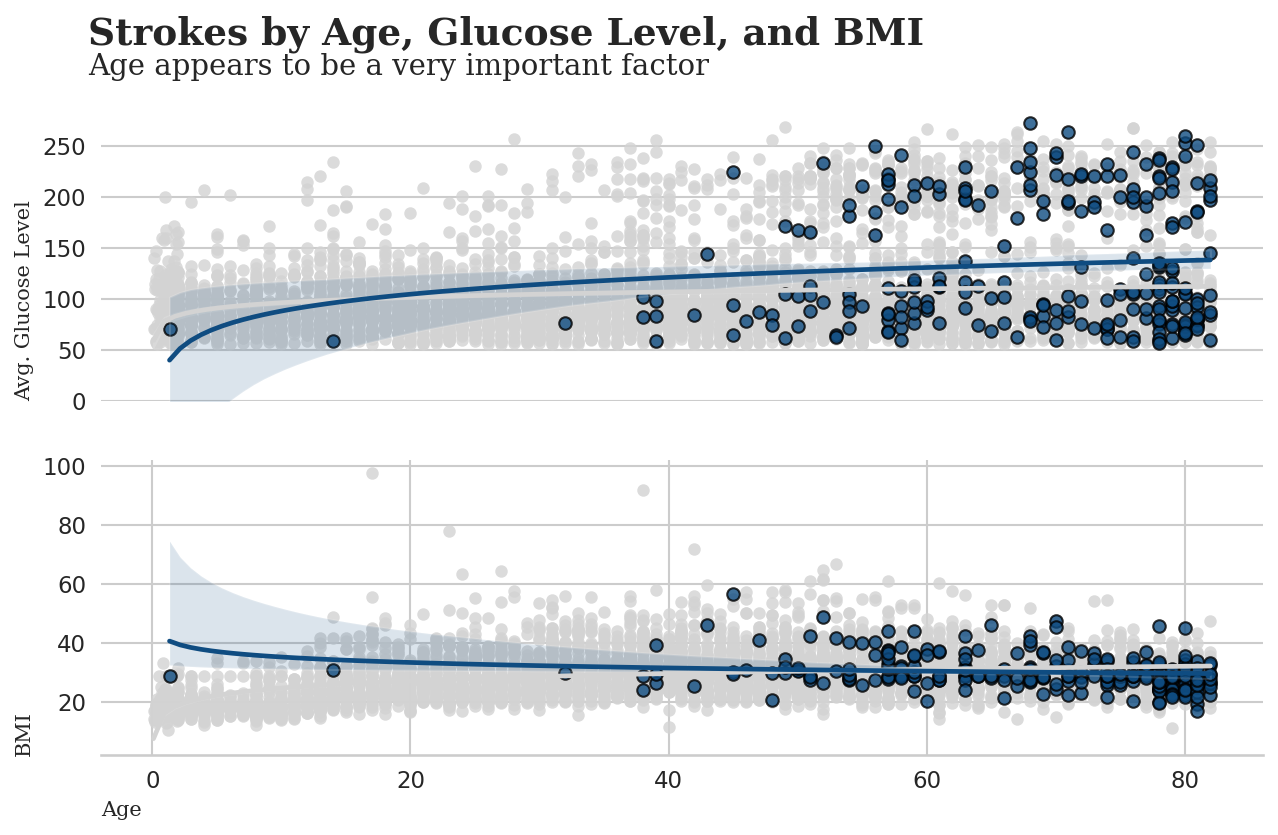

In [22]:
# Setting up figure and axes

fig = plt.figure(figsize=(10,12),dpi=150,facecolor='white') 
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.5, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0:2])
ax1 = fig.add_subplot(gs[1, 0:2]) 

ax0.set_facecolor("white")
ax1.set_facecolor('white')

# glucose

sns.regplot(no_str_only['age'],y=no_str_only['avg_glucose_level'],  
            color='lightgray',
            logx=True,
            ax=ax0)

sns.regplot(str_only['age'],y=str_only['avg_glucose_level'],  
            color='#0f4c81',
            logx=True,scatter_kws={'edgecolors':['black'], 
                                              'linewidth': 1},
            ax=ax0)

ax0.set(ylim=(0, None))
ax0.set_xlabel(" ",fontsize=12,fontfamily='serif')
ax0.set_ylabel("Avg. Glucose Level",fontsize=10,fontfamily='serif',loc='bottom')

ax0.tick_params(axis='x', bottom=False)
ax0.get_xaxis().set_visible(False)

for s in ['top','left','bottom']:
    ax0.spines[s].set_visible(False)
# bmi
sns.regplot(no_str_only['age'],y=no_str_only['bmi'],  
            color='lightgray',
            logx=True,
            ax=ax1)

sns.regplot(str_only['age'],y=str_only['bmi'],  
            color='#0f4c81', scatter_kws={'edgecolors':['black'], 
                                              'linewidth': 1},
            logx=True,
            ax=ax1)

ax1.set_xlabel("Age",fontsize=10,fontfamily='serif',loc='left')
ax1.set_ylabel("BMI",fontsize=10,fontfamily='serif',loc='bottom')


for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

    
ax0.text(-5,350,'Strokes by Age, Glucose Level, and BMI',fontsize=18,fontfamily='serif',fontweight='bold')
ax0.text(-5,320,'Age appears to be a very important factor',fontsize=14,fontfamily='serif')


ax0.tick_params(axis=u'both', which=u'both',length=0)
ax1.tick_params(axis=u'both', which=u'both',length=0)



plt.show()

*  **As expected, age is a very important factor, and also has a relationships with BMI & Avg. Glucose levels.**

* **As the age increases, the risk of having a stroke increases too**
* **

Text(0.5, 1.0, 'Age, Glucose vs Stroke')

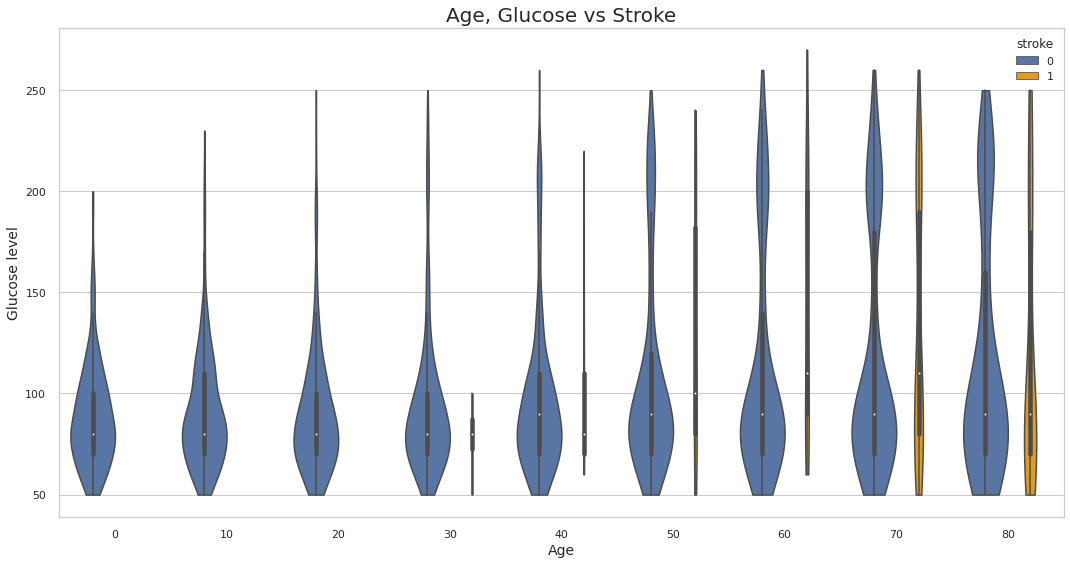

In [23]:
plt.figure(figsize=(18,9))
ax = sns.violinplot(x='binned_age',y='binned_glucose',hue='stroke',data=df,scale='count',palette={0: "b", 1: "orange"},cut=0)
ax.set_xlabel('Age',fontsize=14)
ax.set_ylabel('Glucose level',fontsize=14)
ax.set_title('Age, Glucose vs Stroke',fontsize=20)

*  **people below 40 are immune to strokes even at higher levels of glucose (longer blue violins upto glucose levels of 250 and absence of or thinner orange violins below age of 40)**
*  **the risk of strokes starts around 30-40 years (orange violins get thicker progressively)**
*  **In higher age groups, orange violins have slightly higher median glucose levels (white dots inside the violins) but the range of glucose levels for stroke and non stroke cases is more or less similar. This implies that even in higher age groups there is not much difference between stroke and non stroke cases in terms of glucose levels. It means that in addition to glucose levels there could be other causative factors.**

*  Let's try incorporating some of the other known risk factors in the dataset, namely - hypertension, heart disease, BMI>25 and smoking - and create a new attribute called "no_of_risk_factors"
****

In [24]:
df['smokes'] = np.nan
df['smokes'][df['smoking_status']=='smokes'] = 1
df['smokes'][df['smoking_status']!='smokes'] = 0
df['smokes'] = df['smokes'].astype('int')

In [25]:
df['high_bmi']=np.nan
df['high_bmi'][df['bmi']>=25] = 1
df['high_bmi'][df['bmi']<25] = 0
df['no_of_risk_factors'] = df['hypertension']+df['heart_disease']+df['smokes']+df['high_bmi']

Text(0, 0.5, 'No. of risk factors')

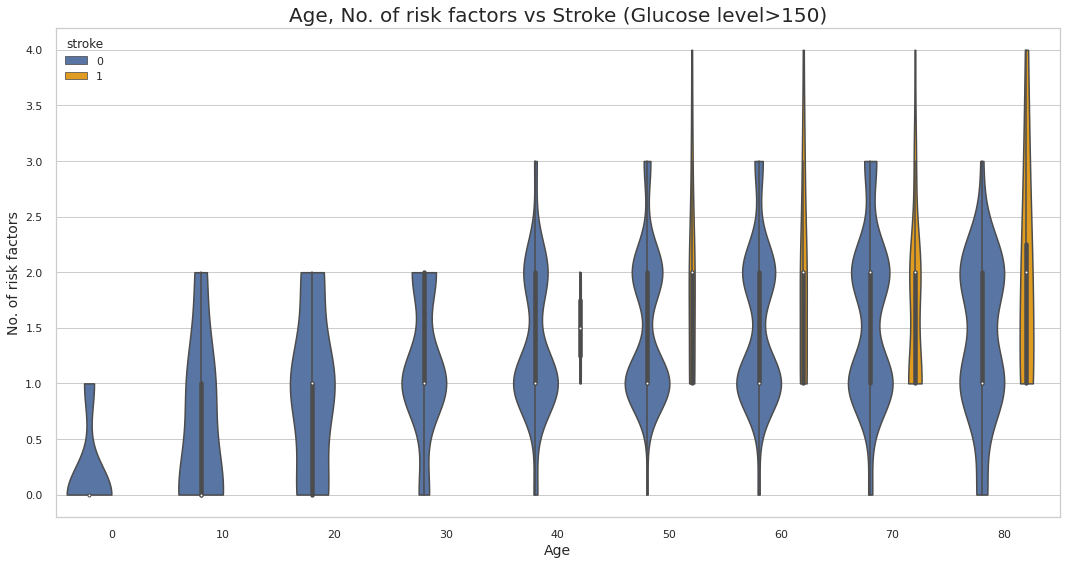

In [26]:
plt.figure(figsize=(18,9))
ax = sns.violinplot(x='binned_age',y='no_of_risk_factors',hue='stroke',data=df[df['binned_glucose']>150],scale='count',palette={0: "b", 1: "orange"},cut=0)
ax.set_title('Age, No. of risk factors vs Stroke (Glucose level>150)',fontsize=20)
ax.set_xlabel('Age',fontsize=14)
ax.set_ylabel('No. of risk factors',fontsize=14)

*  **Incorporating the number of risk factors, we see that the orange violins are placed one risk factor above the blue violins which reveals that the stroke group has 1 additional risk factor at the median and a higher range of number of risk factors compared to the non stroke group.**

*  **In fact, it turns out that the number of risk factors does a good job of predicting strokes on its own as the below line plot shows - as the risk factors rise the corresponding lines rise up and hit higher peaks.**
* **

# <div style="font-family: Trebuchet MS; background-color: #F8F3D4; color: #F6416C; padding: 12px; line-height: 1.5;">4. Preprocessing
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">


<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 3.1 Some statistical information about the dataset</h4> 

<!-- #### 3.1 Some statistical information about the dataset -->

In [27]:
x = data.describe()
x.style.background_gradient(cmap = "YlGn")

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [28]:
#correlation
data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


***

<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 3.2 Handling missing value</h4> 
<!-- ### 3.2 Handling missing value -->

In [29]:
#the number of the missing values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

-  **There are 201 missing records in bmi column.**
***


#### 3.2.1 Handling the missing values in the bmi column

In [30]:
df2=data.copy()

In [31]:
#information about the data in the bmi column
df2["bmi"]

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

<Figure size 1080x720 with 0 Axes>

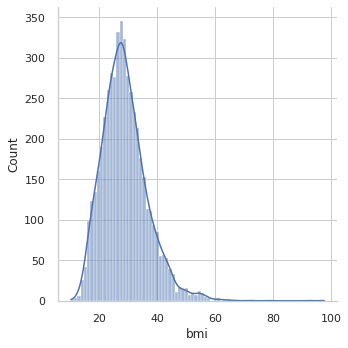

In [32]:
#The distribution of the data of the column
plt.figure(figsize=(15,10))
sns.displot(data = df2, x = "bmi", kde = True)

In [33]:
#filling the missings randomly
fill_list = data["bmi"].dropna()
df2 = data["bmi"].fillna(pd.Series(np.random.choice(fill_list, size = len(data.index))))
df2

0       36.6
1       30.0
2       32.5
3       34.4
4       24.0
        ... 
5105    26.1
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [34]:
df2.isnull().sum()

0

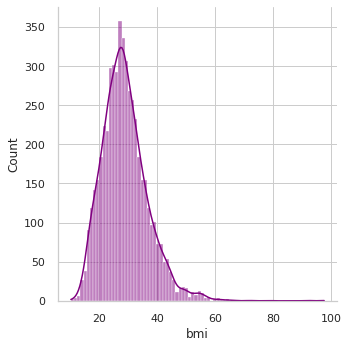

In [35]:
#checking the distribution after filling the missing values randomly
sns.displot(df2, kde = True, color = "Purple")

In [36]:
#filling with the mean
df3 = data["bmi"].fillna(data["bmi"].mean())
df3

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

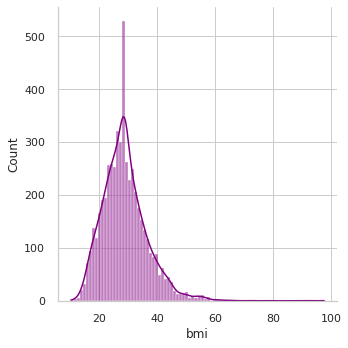

In [37]:
#checking the distribution after filling the missing values with the mean
sns.displot(df3, kde = True, color = "Purple")

- **Filling with the mean has changed the distribution of the column completely, so filling with the mean isn't the best choice here. On the other hand, filling randomly hasn't changed the distribution, so filling randomly is the best choice here.**

In [38]:
#filling the missing randomly
data["bmi"] = df2
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [39]:
data.isnull().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

***

### 3.2.2 Handling the missing values in the smoking_status column

In [40]:
data.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [41]:
data['smoking_status'] = data['smoking_status'].replace(['Unknown'],np.nan)


In [42]:
data.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status       1544
stroke                  0
dtype: int64

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

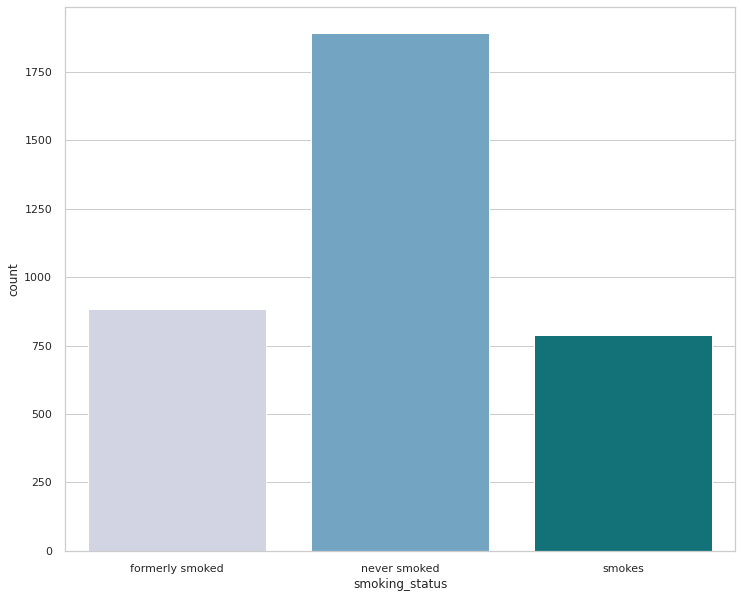

In [43]:
#The distribution of the data of the column
plt.figure(figsize=(12,10))
sns.countplot(data = data, x = "smoking_status",palette='PuBuGn')

In [44]:
#filling the missings randomly
fill_list = data["smoking_status"].dropna()
df4 = data["smoking_status"].fillna(pd.Series(np.random.choice(fill_list, size = len(data.index))))
df4.head

<bound method NDFrame.head of 0       formerly smoked
1          never smoked
2          never smoked
3                smokes
4          never smoked
             ...       
5105       never smoked
5106       never smoked
5107       never smoked
5108    formerly smoked
5109    formerly smoked
Name: smoking_status, Length: 5110, dtype: object>

In [45]:
df4.isnull().sum()

0

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

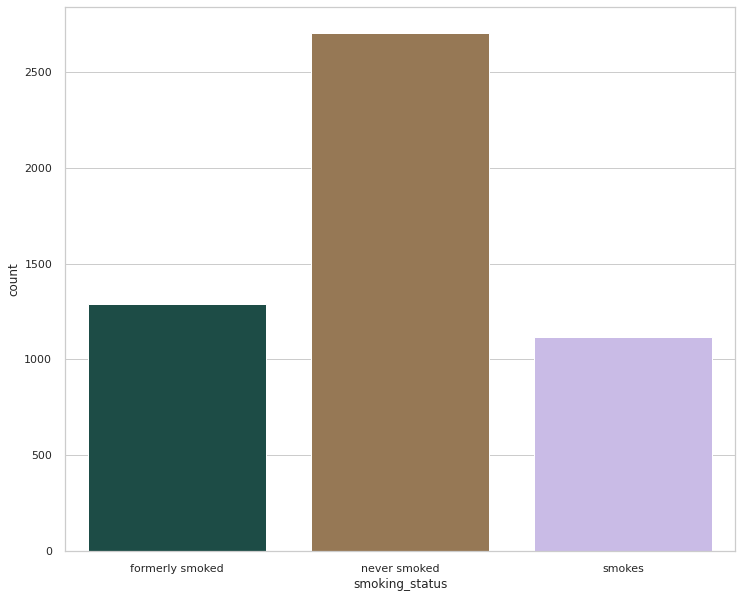

In [46]:
#checking the distribution after filling the missing values randomly
plt.figure(figsize=(12,10))
sns.countplot( x=df4,palette='cubehelix')

### No differance between two plots after and before filling smoking status missing values.
***

<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 3.3 Handling the outliers</h4> 
<!-- ## 3.3 Handling the outliers -->

###  3.2.1 Handling the outliers in the age column

<AxesSubplot:xlabel='stroke', ylabel='age'>

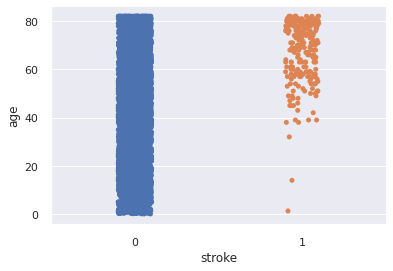

In [47]:
sns.set(rc = {'figure.figsize':(6,4)})
sns.stripplot(y="age", x ="stroke", data = data)

* **There is no outliers in the age column.**
***

#### 3.2.2 Handling the outliers in the avg_glucose_level column

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

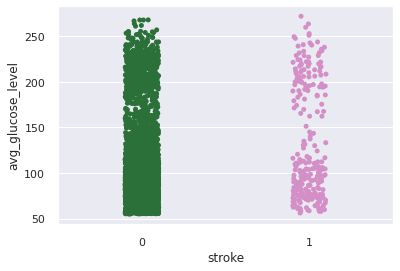

In [48]:
sns.stripplot(y="avg_glucose_level", x ="stroke", data = data, palette='cubehelix')

*  **There is no outliers in this column.**
***

### 3.2.3 Handling the outliers in the bmi column

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

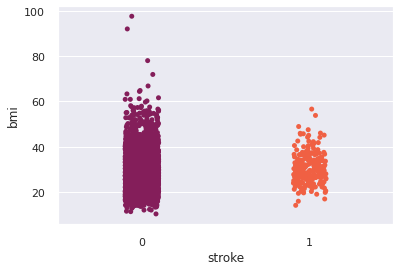

In [49]:
sns.stripplot(y="bmi", x ="stroke", data = data, palette='rocket')

In [50]:
#Handling the outliers in this column
data = data.loc[(data["bmi"]<70)]
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<AxesSubplot:xlabel='stroke', ylabel='bmi'>

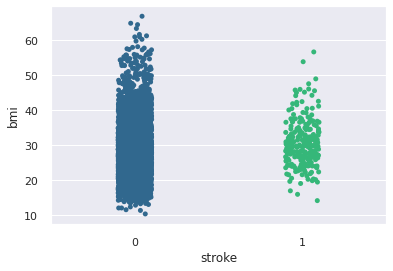

In [51]:
#re-checking for the outliers
sns.stripplot(y="bmi", x ="stroke", data = data, palette='viridis')

### **Now the column has no outliers.**
 ***

### 3.2.4 Handling the outliers in the gender column

 ### **NOTE:** The gender column as was mentioned before has 3 categories:
1. **Female**
2. **Male**
3. **Other**
- **By looking at the other category we will find that has only one record, so we can drop this record.**

In [52]:
data = data.loc[(data["gender"] == "Male") | (data["gender"] == "Female") ]
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


***

<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 3.4 Encoding</h4> 
<!-- # 3.3 Encoding -->

### 3.4.1 Gender column encoding

In [53]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
gender_le = LabelEncoder()
data["gender"] = gender_le.fit_transform(data["gender"])


In [54]:
data.gender.value_counts()

0    2993
1    2112
Name: gender, dtype: int64

### 3.4.2 Ever_married column encoding

In [55]:
evermarried_le = LabelEncoder()
data["ever_married"] = evermarried_le.fit_transform(data["ever_married"])


In [56]:
data.ever_married.value_counts()

1    3351
0    1754
Name: ever_married, dtype: int64

### 3.4.3 Work_type column encoding

In [57]:
worktype_le = LabelEncoder()
data["work_type"] = worktype_le.fit_transform(data["work_type"])


In [58]:
data.work_type.value_counts()

2    2920
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

 ### 3.4.4 Residence_type column encoding

In [59]:
residencetype_le = LabelEncoder()
data["Residence_type"] = residencetype_le.fit_transform(data["Residence_type"])


In [60]:
data.Residence_type.value_counts()

1    2595
0    2510
Name: Residence_type, dtype: int64

### 3.4.5 Smoking_status column encoding

In [61]:
smoking_status_le = LabelEncoder()
data["smoking_status"] = smoking_status_le.fit_transform(data["smoking_status"])


In [62]:
data.smoking_status.value_counts()

1    1890
3    1543
0     884
2     788
Name: smoking_status, dtype: int64

In [63]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,0,1
1,51676,0,61.0,0,0,1,3,0,202.21,30.0,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,1,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,2,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,1,1


<AxesSubplot:>

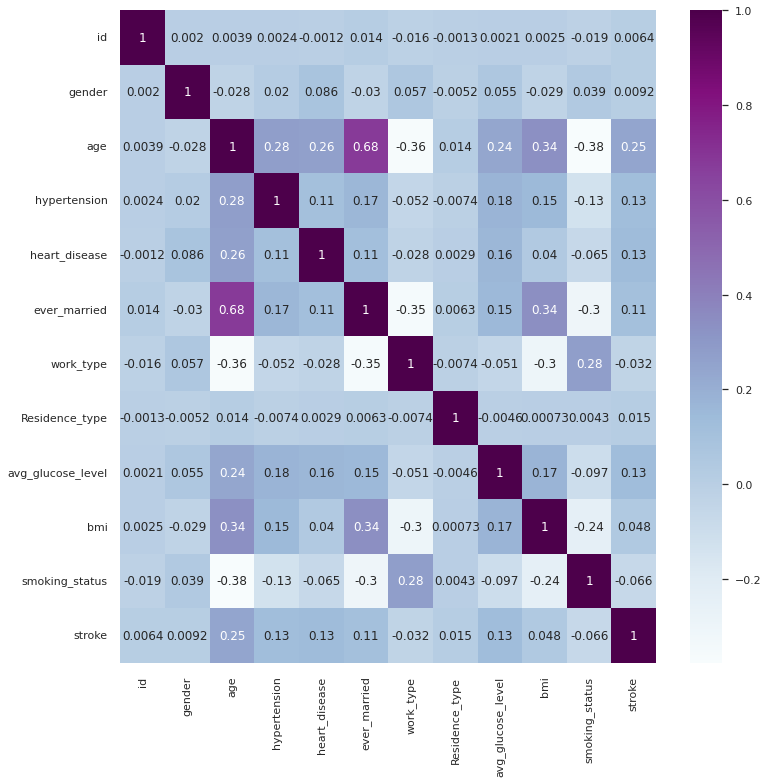

In [64]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cmap="BuPu")

***

<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 3.5 Scaling</h4> 
<!-- # 3.4 Scaling -->

###  As notice the range of columns like bmi,avg_glucose_level and age differes from the range of columns like Residence_type, work_type, etc.. So to avoid that one feature being demonstrated by the others, we need to do feature scaling to make all the features almost have the same range.

In [65]:
#Making a copy from the column that needs to be scaled
stroke_scale = data.iloc[:, :-1]
stroke_scale.reset_index()
norm_scaler = MinMaxScaler()
stroke_scale = norm_scaler.fit_transform(stroke_scale.to_numpy())
stroke_scale = pd.DataFrame (stroke_scale, columns = ["id", "gender", "age", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "avg_glucose_level", "bmi", "smoking_status"])
stroke_scale.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.123214,1.0,0.816895,0.0,1.0,1.0,0.50,1.0,0.801265,0.465487,0.000000
1,0.708205,0.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.679023,0.348673,0.333333
2,0.426015,1.0,0.975586,0.0,1.0,1.0,0.50,0.0,0.234512,0.392920,0.333333
3,0.824928,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.536008,0.426549,0.666667
4,0.021929,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.549349,0.242478,0.333333


In [66]:
data.iloc[:, : -1] = stroke_scale
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,1.0,0.816895,0.0,1.0,1.0,0.50,1.0,0.801265,0.465487,0.000000,1
1,0.708205,0.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.679023,0.348673,0.333333,1
2,0.426015,1.0,0.975586,0.0,1.0,1.0,0.50,0.0,0.234512,0.392920,0.333333,1
3,0.824928,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.536008,0.426549,0.666667,1
4,0.021929,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.549349,0.242478,0.333333,1


In [67]:
data.isnull().sum()

id                   5
gender               5
age                  5
hypertension         5
heart_disease        5
ever_married         5
work_type            5
Residence_type       5
avg_glucose_level    5
bmi                  5
smoking_status       5
stroke               0
dtype: int64

In [68]:
#filling that missing value that appeared after scaling
data["age"].fillna(data["age"].mode()[0], inplace = True)
data["avg_glucose_level"].fillna(data["avg_glucose_level"].mode()[0], inplace = True)
data["bmi"].fillna(data["bmi"].mode()[0], inplace = True)


In [69]:
data.isnull().sum()

id                   5
gender               5
age                  0
hypertension         5
heart_disease        5
ever_married         5
work_type            5
Residence_type       5
avg_glucose_level    0
bmi                  0
smoking_status       5
stroke               0
dtype: int64

***

<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 3.6 Feature Selection</h4> 
<!-- # 3.5 Feature Selection -->

In [70]:
#correlation
x = data.corr()
x.style.background_gradient(cmap = "rocket")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.002175,0.003860,0.002302,-0.001307,0.014300,-0.015622,-0.001426,0.001941,0.002351,-0.018804,0.006383
gender,0.002175,1.000000,-0.027581,0.020714,0.086096,-0.030402,0.056573,-0.004131,0.054265,-0.028791,0.038977,0.009386
age,0.003860,-0.027581,1.000000,0.278665,0.263841,0.678950,-0.362375,0.013921,0.236638,0.334654,-0.375929,0.244665
hypertension,0.002302,0.020714,0.278665,1.000000,0.108937,0.165927,-0.051533,-0.007645,0.177237,0.147431,-0.130330,0.128573
heart_disease,-0.001307,0.086096,0.263841,0.108937,1.000000,0.114550,-0.027973,0.002806,0.162201,0.039937,-0.064801,0.134822
ever_married,0.014300,-0.030402,0.678950,0.165927,0.114550,1.000000,-0.353431,0.006283,0.154233,0.339955,-0.303892,0.108249
work_type,-0.015622,0.056573,-0.362375,-0.051533,-0.027973,-0.353431,1.000000,-0.007322,-0.050914,-0.300405,0.279540,-0.032270
Residence_type,-0.001426,-0.004131,0.013921,-0.007645,0.002806,0.006283,-0.007322,1.000000,-0.004191,0.000538,0.004387,0.015200
avg_glucose_level,0.001941,0.054265,0.236638,0.177237,0.162201,0.154233,-0.050914,-0.004191,1.000000,0.174372,-0.096964,0.132282
bmi,0.002351,-0.028791,0.334654,0.147431,0.039937,0.339955,-0.300405,0.000538,0.174372,1.000000,-0.239295,0.048334


-  **From the correlation table, we can just keep the features which are highly correlated to each other. We are going to keep age, hypertension, heart_disease, avg_glucose_level and ever_married.**

In [71]:
data = data.loc[:, ["age", "hypertension", "heart_disease", "avg_glucose_level","bmi", "ever_married", "stroke"]]
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married,stroke
0,0.816895,0.0,1.0,0.801265,0.465487,1.0,1
1,0.743652,0.0,0.0,0.679023,0.348673,1.0,1
2,0.975586,0.0,1.0,0.234512,0.392920,1.0,1
3,0.597168,0.0,0.0,0.536008,0.426549,1.0,1
4,0.963379,1.0,0.0,0.549349,0.242478,1.0,1


***

<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 3.7 Imbalanced data</h4>  
<!-- ### 3.6 Imbalanced data -->

### As noticed our dataset is imbalanced and that is a problem we need to handle before starting modeling.

In [72]:
data["stroke"].value_counts()

0    4856
1     249
Name: stroke, dtype: int64

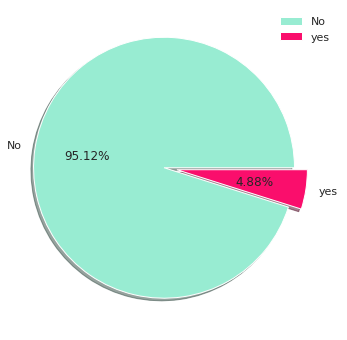

In [73]:
plt.figure(figsize= (8, 6))
data_pie  = [4856 , 249]
labels = ["No", "yes"]
explode = [0.1, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#98ecd2', '#fa0e6c'])
plt.legend()
plt.show()

#### Random Over-Sampling
- Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.


In [74]:
class1 = data.loc[(data["stroke"]==1)]
class1.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married,stroke
0,0.816895,0.0,1.0,0.801265,0.465487,1.0,1
1,0.743652,0.0,0.0,0.679023,0.348673,1.0,1
2,0.975586,0.0,1.0,0.234512,0.392920,1.0,1
3,0.597168,0.0,0.0,0.536008,0.426549,1.0,1
4,0.963379,1.0,0.0,0.549349,0.242478,1.0,1


In [75]:
class0 = data.loc[(data["stroke"]==0)]
class0.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married,stroke
249,0.035645,0.0,0.0,0.184655,0.136283,0.0,0
250,0.707031,1.0,0.0,0.151602,0.511504,1.0,0
251,0.096680,0.0,0.0,0.257455,0.129204,0.0,0
252,0.853516,0.0,0.0,0.064260,0.453097,1.0,0
253,0.169922,0.0,0.0,0.490075,0.155752,0.0,0


-  **The problem here is with class1.**

In [76]:
class1_over = class1.sample(data["stroke"].value_counts()[0], replace=True)
test_over = pd.concat([class1_over, class0], axis=0)
test_over.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married,stroke
204,0.658203,0.0,0.0,0.151094,0.368142,1.0,1
175,0.877930,1.0,0.0,0.601837,0.474336,1.0,1
122,0.975586,0.0,0.0,0.944096,0.378761,1.0,1
23,1.000000,0.0,1.0,0.707137,0.392920,1.0,1
36,0.902344,0.0,0.0,0.759856,0.414159,1.0,1


In [77]:
test_over["stroke"].value_counts()

1    4856
0    4856
Name: stroke, dtype: int64

In [78]:
data = test_over.copy().reset_index()
data.head()

,index,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married,stroke
0,204,0.658203,0.0,0.0,0.151094,0.368142,1.0,1
1,175,0.877930,1.0,0.0,0.601837,0.474336,1.0,1
2,122,0.975586,0.0,0.0,0.944096,0.378761,1.0,1
3,23,1.000000,0.0,1.0,0.707137,0.392920,1.0,1
4,36,0.902344,0.0,0.0,0.759856,0.414159,1.0,1


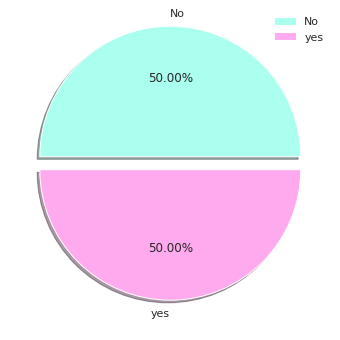

In [79]:
plt.figure(figsize= (8, 6))
data_pie  = [4856 , 4856]
labels = ["No", "yes"]
explode = [0.1, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#aaffee', '#ffaaee'])
plt.legend()
plt.show()

*  **The problem has been solved**
***

# <div style="font-family: Trebuchet MS; background-color: #F8F3D4; color: #F6416C; padding: 12px; line-height: 1.5;">5.Split Data
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">

In [80]:
data=data.dropna()

In [81]:
X = data.drop(['stroke','index'], axis= 1).values 
y = data['stroke'].values

In [82]:
X.shape

(9707, 6)

In [83]:
y.shape

(9707,)

In [84]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size= 0.20, random_state =42,shuffle=True)

In [85]:
X_train.shape

(7765, 6)

In [86]:
y_train.shape

(7765,)

***

# <div style="font-family: Trebuchet MS; background-color: #F8F3D4; color: #F6416C; padding: 12px; line-height: 1.5;">6.Modeling
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">

- **Our problem here is a classification problem, so we are going to deal with ML models like:**
1. Logistic Regression
2. K-Nearest Neighbor (KNN)
3. Decision Tree (DT)
4. Random Forest (RF)
5. Support Vector Machine (SVM)
6. XGBoost
7. AdaBoost
8. Voting

<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 4.1 Logistic Regression</h4> 
<!-- ### 4.1 Logistic Regression -->


In [87]:

lr = LogisticRegression()
#Training the model
lr.fit(X_train, y_train)

LogisticRegression()

In [88]:
#The score of the training process
lr_train_score = lr.score(X_train, y_train)
lr_train_score

0.7656149388280747

In [89]:
#The score of the testing process
lr_test_score = lr.score(X_test, y_test)
lr_test_score

0.7615859938208033

- As the accuracy of both the training and the testing processes are so close, we don't have overfitting.

In [90]:
lr_y_pred = lr.predict(X_test)
df_out = pd.DataFrame({"y_test":y_test, "y_pred": lr_y_pred})
df_out.head()

,y_test,y_pred
0,1,1
1,1,0
2,0,0
3,0,0
4,0,0


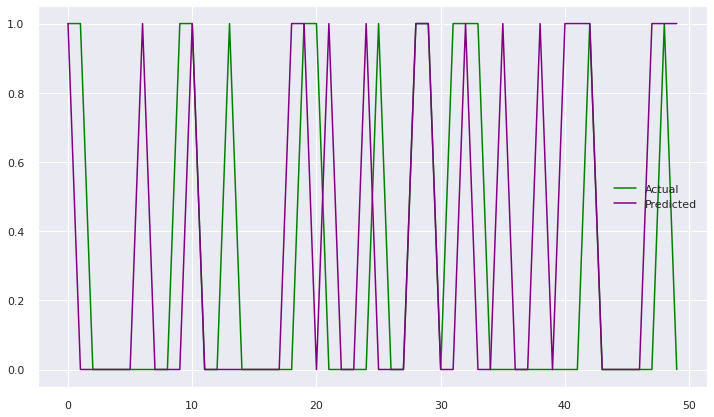

In [91]:
plt.figure(figsize=(12,7))
plt.plot(df_out[:50])
plt.gca().get_lines()[0].set_color("green")
plt.gca().get_lines()[1].set_color("purple")
plt.legend(["Actual", "Predicted"])

***

#### 4.1.1 LR model evaluation

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

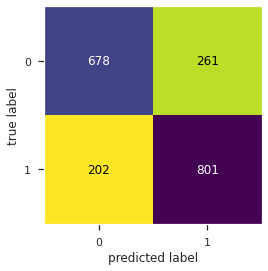

In [92]:
#confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, lr_y_pred), cmap = "viridis_r")

In [93]:
lr_ac_score=roc_auc_score(y_test, lr_y_pred)
lr_f1_score=f1_score(y_test, lr_y_pred)
lr_prc_score=precision_score(y_test, lr_y_pred)
lr_rec_score=recall_score(y_test, lr_y_pred)

print('Roc ACU Score :',lr_ac_score)
print('F1_Score :',lr_f1_score)
print('Precesion',lr_prc_score)
print('Recall',lr_rec_score)

Roc ACU Score : 0.7603244579360958
F1_Score : 0.7757869249394673
Precesion 0.7542372881355932
Recall 0.7986041874376869


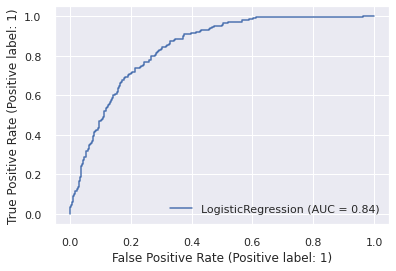

In [94]:
#AUC
plot_roc_curve(lr, X_test, y_test)

***

<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 4.2 K-Nearest Neighbor</h4>   
<!-- ### 4.2 K-Nearest Neighbor -->

In [95]:
knn = KNeighborsClassifier()

In [96]:
params = {'n_neighbors': [2, 3, 4, 5, 6, 7]}
grid = GridSearchCV(knn, params, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid.fit(X_train, y_train)
print(grid.best_params_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
{'n_neighbors': 2}


In [97]:
knn = KNeighborsClassifier(n_neighbors = 2)
#Training the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [98]:
#The score of the training process
knn_train_score = knn.score(X_train, y_train)
knn_train_score

1.0

In [99]:
#The score of the testing process
knn_test_score = knn.score(X_test, y_test)
knn_test_score

0.9742533470648815

- #### Here we have only 2 classes, so we had to set the n_neighbors hyper parameter to 2 (Binary classifier).
- #### The model is non-parametric, so we don't have neither coefficients nor intercept.

In [100]:
knn_y_pred = knn.predict(X_test)
df_out = pd.DataFrame({"y_test":y_test, "y_pred": knn_y_pred})
df_out.head()

,y_test,y_pred
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0


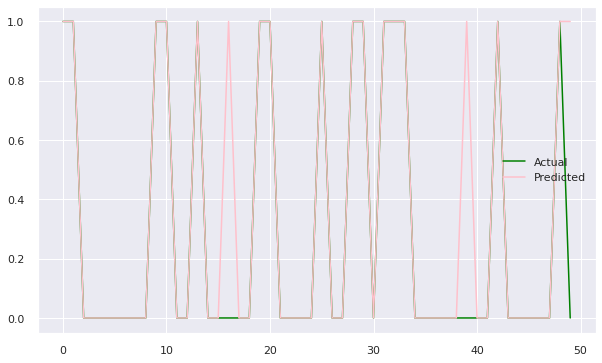

In [101]:
plt.figure(figsize=(10,6))
plt.plot(df_out[:50])
plt.gca().get_lines()[0].set_color("green")
plt.gca().get_lines()[1].set_color("pink")
plt.legend(["Actual", "Predicted"])

***

### 4.2.1 KNN model evaluation


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

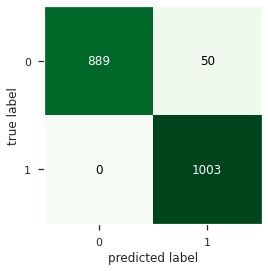

In [102]:
#confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, knn_y_pred), cmap = "Greens")

In [103]:
knn_ac_score=roc_auc_score(y_test, knn_y_pred)
knn_f1_score=f1_score(y_test, knn_y_pred)
knn_prc_score=precision_score(y_test, knn_y_pred)
knn_rec_score=recall_score(y_test, knn_y_pred)

print('Roc ACU Score :',knn_ac_score)
print('F1_Score :',knn_f1_score)
print('Precesion',knn_prc_score)
print('Recall',knn_rec_score)

Roc ACU Score : 0.9733759318423856
F1_Score : 0.97568093385214
Precesion 0.9525166191832859
Recall 1.0


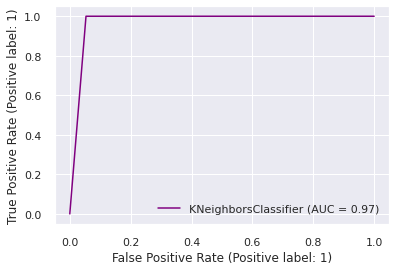

In [104]:
#AUC
plot_roc_curve(knn, X_test, y_test, color = "purple")

***

<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 4.3 Decision Tree (DT)</h4>   


In [105]:
dt = DecisionTreeClassifier()

In [106]:
params = {'max_depth': list(range(4, 23)), "max_features" : [2,3,4,5,6]}
grid = GridSearchCV(dt, params, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid.fit(X_train, y_train)
print(grid.best_params_)

Fitting 10 folds for each of 95 candidates, totalling 950 fits
{'max_depth': 21, 'max_features': 4}


In [107]:
dt = DecisionTreeClassifier(max_depth = 21, max_features = 3)
#Training the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=21, max_features=3)

In [108]:
#The score of the training process
dt_train_score = dt.score(X_train, y_train)
dt_train_score

0.998454603992273

In [109]:
#The score of the testing process
dt_test_score = dt.score(X_test, y_test)
dt_test_score

0.9809474768280123

In [110]:
dt_y_pred = dt.predict(X_test)
df_out = pd.DataFrame({"y_test":y_test, "y_pred": dt_y_pred})
df_out.head()

,y_test,y_pred
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0


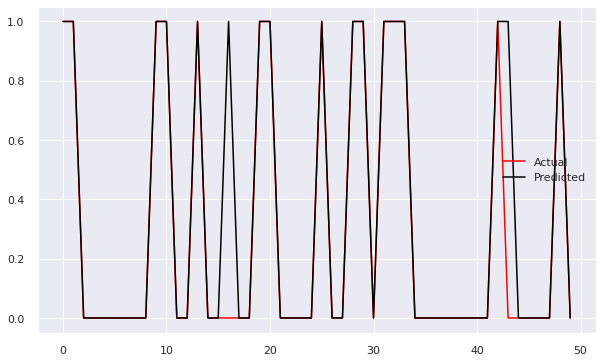

In [111]:
plt.figure(figsize=(10,6))
plt.plot(df_out[:50])
plt.gca().get_lines()[0].set_color("red")
plt.gca().get_lines()[1].set_color("black")
plt.legend(["Actual", "Predicted"])

***

### 4.3.1 DT Model evaluation

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

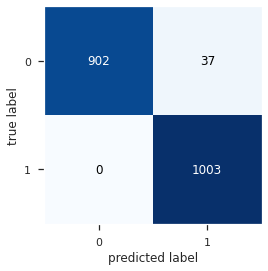

In [112]:
#confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, dt_y_pred))

In [113]:
dt_ac_score=roc_auc_score(y_test, dt_y_pred)
dt_f1_score=f1_score(y_test, dt_y_pred)
dt_prc_score=precision_score(y_test, dt_y_pred)
dt_rec_score=recall_score(y_test, dt_y_pred)

print('Roc ACU Score :',dt_ac_score)
print('F1_Score :',dt_f1_score)
print('Precesion',dt_prc_score)
print('Recall',dt_rec_score)

Roc ACU Score : 0.9802981895633653
F1_Score : 0.9818893783651493
Precesion 0.9644230769230769
Recall 1.0


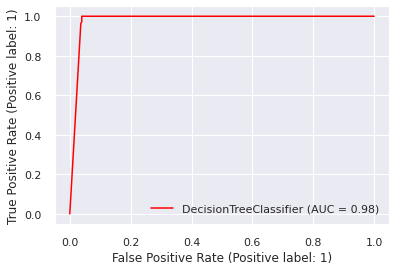

In [114]:
#AUC
plot_roc_curve(dt, X_test, y_test, color = "red")

***

<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 4.4 Random Forest (RF)</h4>  
<!-- ## 4.4 Random Forest (RF) -->

In [115]:
params = {'max_depth': list(range(6,16)), "max_features" : [2,3,4,5,6]}
grid = GridSearchCV(RandomForestClassifier(random_state = 42), params, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid.fit(X_train, y_train)
print(grid.best_params_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
{'max_depth': 15, 'max_features': 2}


In [116]:
rf = RandomForestClassifier(max_depth = 15, max_features = 4)
#Training the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features=4)

In [117]:
#The score of the training process
rf_train_score = rf.score(X_train, y_train)
rf_train_score

0.9965228589826143

In [118]:
#The score of the testing process
rf_test_score = rf.score(X_test, y_test)
rf_test_score

0.9768280123583934

In [119]:
rf_y_pred = rf.predict(X_test)
df_out = pd.DataFrame({"y_test":y_test, "y_pred": rf_y_pred})
df_out.head()

,y_test,y_pred
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0


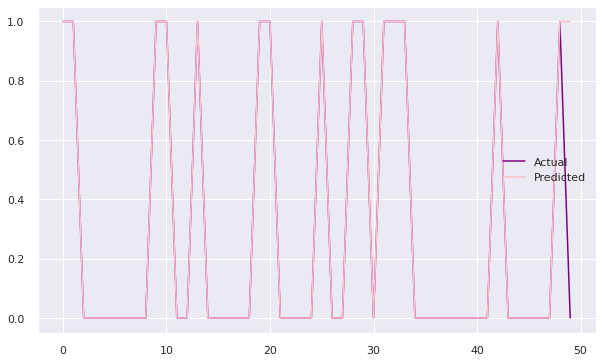

In [120]:
plt.figure(figsize=(10,6))
plt.plot(df_out[:50])
plt.gca().get_lines()[0].set_color("purple")
plt.gca().get_lines()[1].set_color("pink")
plt.legend(["Actual", "Predicted"])

***

### 4.4.1 RF model evaluation

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

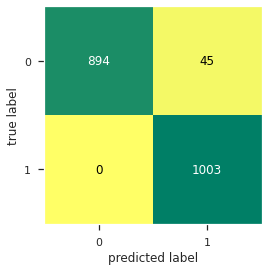

In [121]:
#confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, rf_y_pred), cmap = "summer_r")

In [122]:
rf_ac_score=roc_auc_score(y_test, rf_y_pred)
rf_f1_score=f1_score(y_test, rf_y_pred)
rf_prc_score=precision_score(y_test, rf_y_pred)
rf_rec_score=recall_score(y_test, rf_y_pred)

print('Roc ACU Score :',rf_ac_score)
print('F1_Score :',rf_f1_score)
print('Precesion',rf_prc_score)
print('Recall',rf_rec_score)

Roc ACU Score : 0.976038338658147
F1_Score : 0.9780594831789372
Precesion 0.9570610687022901
Recall 1.0


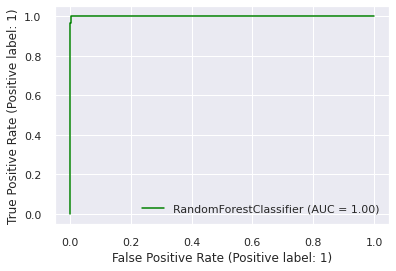

In [123]:
#AUC
plot_roc_curve(rf, X_test, y_test, color = 'green')

***

<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 4.5 Support Vector Machine (SVM)</h4> 
<!-- # 4.5 Support Vector Machine (SVM) -->

In [124]:
svc=SVC() 

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)
svc_train_score=svc.score(X_train, y_train)
svc_test_score=svc.score(X_test, y_test)
print('Training set score: ',svc_train_score)

print('Test set score:',svc_test_score)

Training set score:  0.7730843528654218
Test set score: 0.7636457260556128


In [125]:
svc_y_pred = svc.predict(X_test)
df_out = pd.DataFrame({"y_test":y_test, "y_pred": svc_y_pred})
df_out.head()

,y_test,y_pred
0,1,1
1,1,0
2,0,0
3,0,0
4,0,0


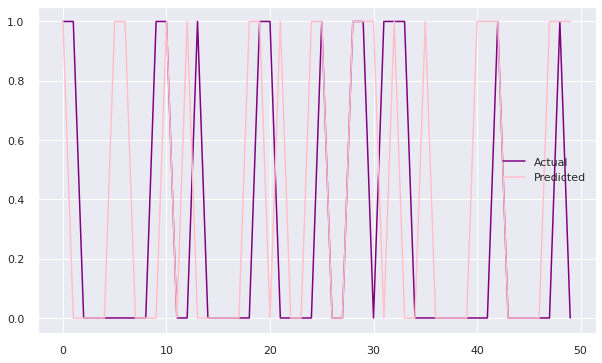

In [126]:
plt.figure(figsize=(10,6))
plt.plot(df_out[:50])
plt.gca().get_lines()[0].set_color("purple")
plt.gca().get_lines()[1].set_color("pink")
plt.legend(["Actual", "Predicted"])

***

### 4.5.1 SVM model evalution

In [127]:
svc_ac_score=roc_auc_score(y_test, svc_y_pred)
svc_f1_score=f1_score(y_test, svc_y_pred)
svc_prc_score=precision_score(y_test, svc_y_pred)
svc_rec_score=recall_score(y_test, svc_y_pred)

print('Roc ACU Score :',svc_ac_score)
print('F1_Score :',svc_f1_score)
print('Precesion',svc_prc_score)
print('Recall',svc_rec_score)

Roc ACU Score : 0.7615370077201834
F1_Score : 0.7829787234042553
Precesion 0.7446043165467626
Recall 0.8255234297108675


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

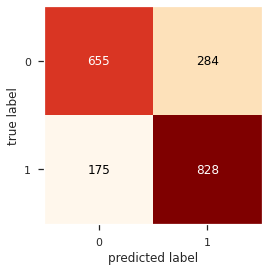

In [128]:
#confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, svc_y_pred), cmap = "OrRd")

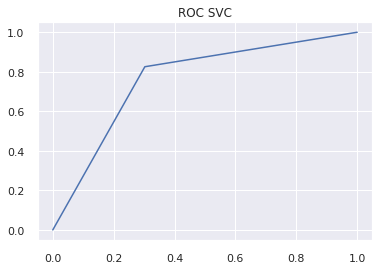

In [129]:
from sklearn import metrics
svc_fpr, svc_tpr, _ = metrics.roc_curve(y_test,  svc_y_pred)
plt.title('ROC SVC')
plt.plot(svc_fpr,svc_tpr)

# Linear

In [130]:
# linear_svc=SVC(kernel='linear', C=0.1 ,gamma=0.06) 

# linear_svc.fit(X_train,y_train)

# y_pred_test=linear_svc.predict(X_test)


# print('Training set score: ',linear_svc.score(X_train, y_train))

# print('Test set score:',linear_svc.score(X_test, y_test))

# Polynomial

In [131]:
# poly_svc=SVC(kernel='poly', C=1) 

# poly_svc.fit(X_train,y_train)

# y_pred=poly_svc.predict(X_test)

# print('Training set score: ',poly_svc.score(X_train, y_train))

# print('Test set score:',poly_svc.score(X_test, y_test))

# Sigmoid

In [132]:
# sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# sigmoid_svc.fit(X_train,y_train)


# y_pred=sigmoid_svc.predict(X_test)


# print('Training set score: ',sigmoid_svc.score(X_train, y_train))

# print('Test set score:',sigmoid_svc.score(X_test, y_test))

***

<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 4.6 XGBoost</h4> 
<!-- # 4.6 XGBoost -->

In [133]:
xgb = XGBClassifier(max_depth= 25 ,learning_rate = 0.9 , objective = "binary:logistic", n_estimators=30, random_state=42 )
xgb.fit(X_train , y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.9, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=25, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=30, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [134]:
xgb_train_score=xgb.score(X_train , y_train)
xgb_train_score

1.0

In [135]:
xgb_test_score=xgb.score(X_test , y_test)
xgb_test_score

0.9768280123583934

In [136]:
xgb_y_pred = xgb.predict(X_test)
df_out = pd.DataFrame({"y_test":y_test, "y_pred": xgb_y_pred})
df_out.head()

,y_test,y_pred
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0


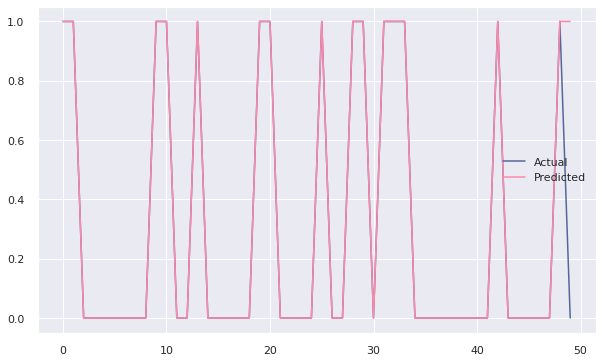

In [137]:
plt.figure(figsize=(10,6))
plt.plot(df_out[:50])
plt.gca().get_lines()[0].set_color("#556699")
plt.gca().get_lines()[1].set_color("#ff88aa")
plt.legend(["Actual", "Predicted"])

***

### 4.6.1 XGBoost model evalution 

In [138]:
xgb_ac_score=roc_auc_score(y_test, xgb_y_pred)
xgb_f1_score=f1_score(y_test, xgb_y_pred)
xgb_prc_score=precision_score(y_test, xgb_y_pred)
xgb_rec_score=recall_score(y_test, xgb_y_pred)

print('Roc ACU Score :',xgb_ac_score)
print('F1_Score :',xgb_f1_score)
print('Precesion',xgb_prc_score)
print('Recall',xgb_rec_score)

Roc ACU Score : 0.976038338658147
F1_Score : 0.9780594831789372
Precesion 0.9570610687022901
Recall 1.0


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

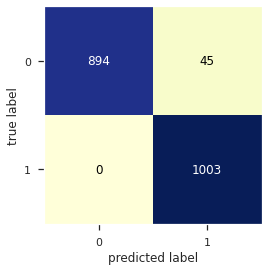

In [139]:
#confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, xgb_y_pred), cmap = "YlGnBu")

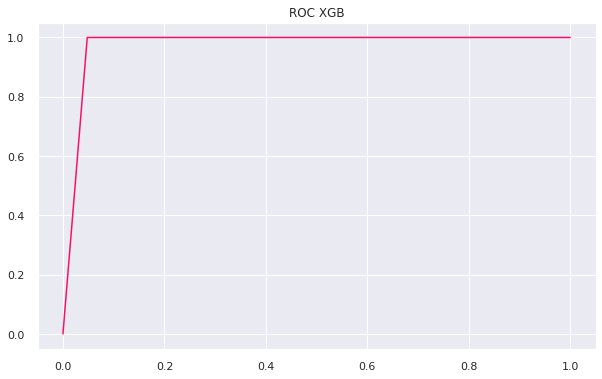

In [140]:
plt.figure(figsize=(10,6))
xgb_fpr, xgb_tpr, _ = metrics.roc_curve(y_test,  xgb_y_pred)
plt.title('ROC XGB')
plt.plot(xgb_fpr,xgb_tpr,color='#fa0e6c')

<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 4.7 AdaBoostClassifier</h4> 
<!-- # 4.7 AdaBoostClassifier -->


In [141]:
ada = AdaBoostClassifier(learning_rate = 0.9 , n_estimators=20, random_state=42 )
ada.fit(X_train , y_train)
ada_train_score=ada.score(X_train , y_train)
ada_train_score

0.7792659368963297

In [142]:
ada_test_score=ada.score(X_test , y_test)
ada_test_score

0.7842430484037075

In [143]:
ada_y_pred = ada.predict(X_test)
df_out = pd.DataFrame({"y_test":y_test, "y_pred": ada_y_pred})
df_out.head()

,y_test,y_pred
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0


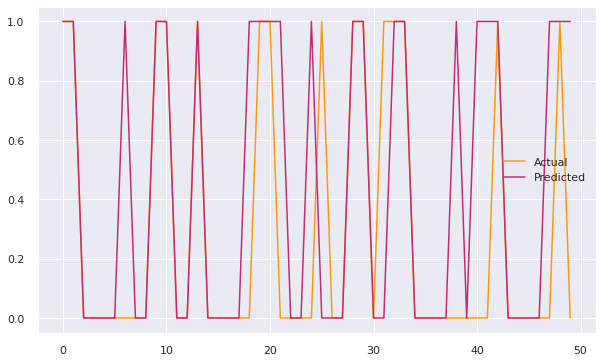

In [144]:
plt.figure(figsize=(10,6))
plt.plot(df_out[:50])
plt.gca().get_lines()[0].set_color("#ff9911")
plt.gca().get_lines()[1].set_color("#c42b70")
plt.legend(["Actual", "Predicted"])

***

### 4.7.1 AdaBoost model evalution

In [145]:
ada_ac_score=roc_auc_score(y_test, ada_y_pred)
ada_f1_score=f1_score(y_test, ada_y_pred)
ada_prc_score=precision_score(y_test, ada_y_pred)
ada_rec_score=recall_score(y_test, ada_y_pred)

print('Roc ACU Score :',ada_ac_score)
print('F1_Score :',ada_f1_score)
print('Precesion',ada_prc_score)
print('Recall',ada_rec_score)

Roc ACU Score : 0.7811374184156795
F1_Score : 0.8073563218390806
Precesion 0.7491467576791809
Recall 0.8753738783649053


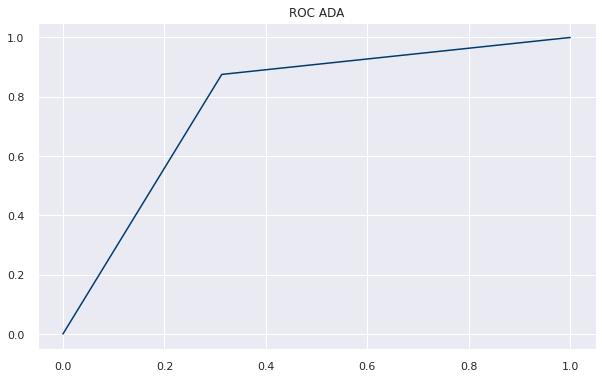

In [146]:
plt.figure(figsize=(10,6))
ada_fpr, ada_tpr, _ = metrics.roc_curve(y_test,  ada_y_pred)
plt.title('ROC ADA')
plt.plot(ada_fpr,ada_tpr,c='#003b6f')

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

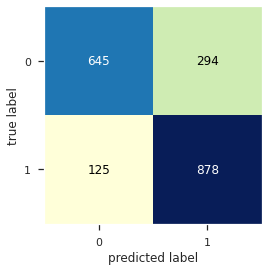

In [147]:
#confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, ada_y_pred), cmap = "YlGnBu")

***

<h4 style = "background-color: white; color : #F6416C; font-size: 20px; font-family:Lucida Sans; font-weight: 3; border-radius: 75px 150px; text-align: left"> 4.8 Voting </h4> 
<!-- # 4.8 Voting  -->

In [148]:
vot = VotingClassifier(estimators=[("KNeighborsClassifier" , knn),("DescitionTreeClassifier", dt),
                                     ("RandomForestClassifier", rf) , ("XGBClassifier" , xgb)] , voting= 'hard')

In [149]:
vot.fit(X_train , y_train)
vot_train_score=vot.score(X_train , y_train)
vot_train_score

1.0

In [150]:
vot_test_score=vot.score(X_test , y_test)
vot_test_score

0.9876416065911432

In [151]:
vot_y_pred = rf.predict(X_test)
df_out = pd.DataFrame({"y_test":y_test, "y_pred": vot_y_pred})
df_out.head()

,y_test,y_pred
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0


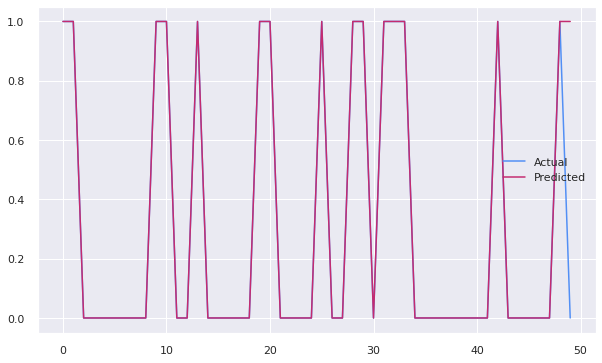

In [152]:
plt.figure(figsize=(10,6))
plt.plot(df_out[:50])
plt.gca().get_lines()[0].set_color("#528ff5")
plt.gca().get_lines()[1].set_color("#c42b70")
plt.legend(["Actual", "Predicted"])

***

### 4.8.1 Voting model evalution

In [153]:
vot_ac_score=accuracy_score(y_test, vot_y_pred)
vot_f1_score=f1_score(y_test, vot_y_pred)
vot_prc_score=precision_score(y_test, vot_y_pred)
vot_rec_score=recall_score(y_test, vot_y_pred)

print('Score :',vot_ac_score)
print('F1_Score :',vot_f1_score)
print('Precesion',vot_prc_score)
print('Recall',vot_rec_score)

Score : 0.9768280123583934
F1_Score : 0.9780594831789372
Precesion 0.9570610687022901
Recall 1.0


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

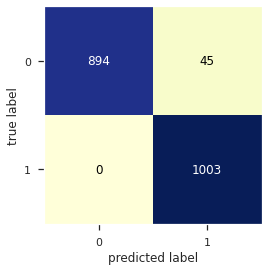

In [154]:
#confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, vot_y_pred), cmap = "YlGnBu")

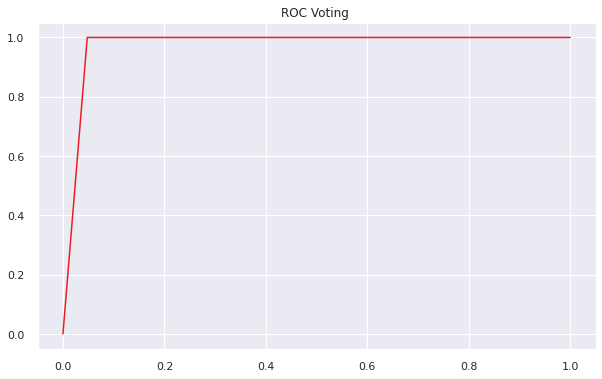

In [155]:
plt.figure(figsize=(10,6))
vot_fpr, vot_tpr, _ = metrics.roc_curve(y_test,  vot_y_pred)
plt.title('ROC Voting ')
plt.plot(vot_fpr,vot_tpr,c='#ed1c24')

In [156]:
matrix = classification_report(vot_y_pred,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       894
           1       0.78      0.83      0.81      1048

    accuracy                           0.78      1942
   macro avg       0.78      0.78      0.78      1942
weighted avg       0.78      0.78      0.78      1942



***

# <div style="font-family: Trebuchet MS; background-color: #F8F3D4; color: #F6416C; padding: 12px; line-height: 1.5;">7.Overview
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">

In [157]:
myarray = np.array([[lr_train_score,lr_test_score,lr_ac_score,lr_f1_score,lr_prc_score,lr_rec_score],[knn_train_score,knn_test_score,knn_ac_score,knn_f1_score,knn_prc_score,knn_rec_score],[dt_train_score,dt_test_score,dt_ac_score,dt_f1_score,dt_prc_score,dt_rec_score],[rf_train_score,rf_test_score,rf_ac_score,rf_f1_score,rf_prc_score,rf_rec_score],[svc_train_score,svc_test_score,svc_ac_score,svc_f1_score,svc_prc_score,svc_rec_score],[xgb_train_score,xgb_test_score,xgb_ac_score,xgb_f1_score,xgb_prc_score,xgb_rec_score],
                    [ada_train_score,ada_test_score,ada_ac_score,ada_f1_score,ada_prc_score,ada_rec_score],[vot_train_score,vot_test_score,vot_ac_score,vot_f1_score,vot_prc_score,vot_rec_score]])

rownames = ['logistic Regression','KNN','Decision Tree','Random Forest','SVC', 'XGBoost','AdaBoost','Voting']
colnames = ['Train Score', 'Test Score', 'Roc ACU Score','F1 Score','Precision Score','Recall Score']

df = pd.DataFrame(myarray, index=rownames, columns=colnames)
df.style.set_caption("Summary of all Models ").set_precision(5).background_gradient(cmap='YlOrBr')
# print(df)



,Train Score,Test Score,Roc ACU Score,F1 Score,Precision Score,Recall Score
logistic Regression,0.76561,0.76159,0.76032,0.77579,0.75424,0.79860
KNN,1.00000,0.97425,0.97338,0.97568,0.95252,1.00000
Decision Tree,0.99845,0.98095,0.98030,0.98189,0.96442,1.00000
Random Forest,0.99652,0.97683,0.97604,0.97806,0.95706,1.00000
SVC,0.77308,0.76365,0.76154,0.78298,0.74460,0.82552
XGBoost,1.00000,0.97683,0.97604,0.97806,0.95706,1.00000
AdaBoost,0.77927,0.78424,0.78114,0.80736,0.74915,0.87537
Voting,1.00000,0.98764,0.97683,0.97806,0.95706,1.00000


***

In [158]:
pred_y=[lr_y_pred,knn_y_pred,dt_y_pred,rf_y_pred,svc_y_pred,xgb_y_pred,ada_y_pred,vot_y_pred]
for (i,j) in zip(pred_y, rownames):
    print(j)
    matrix = classification_report(i,y_pred )
    print(matrix)
    print('-'*50)


logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       880
           1       0.94      0.98      0.96      1062

    accuracy                           0.96      1942
   macro avg       0.96      0.95      0.96      1942
weighted avg       0.96      0.96      0.96      1942

--------------------------------------------------
KNN
              precision    recall  f1-score   support

           0       0.78      0.73      0.76       889
           1       0.78      0.83      0.81      1053

    accuracy                           0.78      1942
   macro avg       0.78      0.78      0.78      1942
weighted avg       0.78      0.78      0.78      1942

--------------------------------------------------
Decision Tree
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       902
           1       0.77      0.82      0.79      1040

    accuracy                           0.7

# <div style="font-family: Trebuchet MS; background-color: #F8F3D4; color: #F6416C; padding: 12px; line-height: 1.5;">8.Conclusion
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">

<h3><b>XGBoost  is the best model for this data.</b></h3><br>
    > accuracy - 100%<br>
    > Recall - 100%<br>
<h4> One thing great is that the model doesn't mis-classifies any Stroke Patient as a Non-Stroke patient. We don't want any patient who is suffering from Stroke to be classified as Non-Stroke and not getting the required medical facilities. 
    

***


<div style='font-size:400%;'>
    <a id='import'></a>
    <h3 style='color: #000000; font-family: Cascadia code;'>
        <center> Please, feel free to contact us for any further information! </center>
<!--     </h3> -->
    <h1 style='color: #000000; font-weight: bold; font-family: Cascadia code;'>
        <center> THANK YOU! </center>
<!--     </h1> -->
    <center><img style='height: 10%; width: 10%' src="https://cdn5.vectorstock.com/i/thumb-large/17/64/check-mark-icon-design-template-isolated-vector-23961764.jpg"> </center>
</div>
        